<a href="https://colab.research.google.com/github/deremmanuel/Navegaci-n-Aut-noma_Equipo-15/blob/main/Avance5_Equipo_5_Adultos_revisi%C3%B3n_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Instituto Tecnológico y de Estudios Superiores de Monterrey**

##**Maestría en Inteligencia Artificial Aplicada**

### TC5035.10 Proyecto Integrador - "Modelación y predicción del impacto de las experiencias benevolentes en la infancia en las Condiciones de Bienestar Emocional (BCEs) en niños y adultos mexicanos"


#### Dra. Grettel Barceló Alonso - Asesor del proyecto

**Avance 5. Modelo Final**


>Equipo # 5
>* Karla Daniela Valenzuela A00819192
>* Emmanuel Domínguez Bravo A01793683


In [ ]:
#!pip install pyreadstat

In [1]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
#!pip install prince

In [ ]:
#!pip install sweetviz

In [ ]:
#pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.8 MB/s eta 0:00:00


In [2]:
# importamos las librerías requeridas

import numpy as np
import pandas as pd
#import pyreadstat
from sklearn.feature_selection import chi2

import re
import matplotlib.pyplot as plt
#import prince
import seaborn as sns
#import sweetviz as sv
from tabulate import tabulate
from collections import Counter
import pydotplus
from IPython.display import Image
from numpy.core.function_base import linspace

from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import RocCurveDisplay
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.compose import make_column_transformer

from feature_engine.encoding import MeanEncoder, OneHotEncoder, OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA, FastICA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer, recall_score

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from imblearn.pipeline import make_pipeline

from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay

import xgboost as xgb
from xgboost import plot_importance, plot_tree, plotting, XGBClassifier

#import dtreeviz
import graphviz
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
random_state = 1234
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)



In [3]:
! git clone https://github.com/danielav081596/Proyecto_Integrador_Equipo5.git

Cloning into 'Proyecto_Integrador_Equipo5'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 87 (delta 43), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (87/87), 40.92 MiB | 6.31 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Updating files: 100% (20/20), done.


In [60]:
# Creamos un dataframe del archivo .csv

df_adultos_original = pd.read_csv('/content/Proyecto_Integrador_Equipo5/ACEs Adultos.csv', encoding='latin1')

df_adultos = df_adultos_original.copy()

In [61]:
# La base de datos tiene 689 columnas:

df_adultos.head()

,FOLIO,FOLIO2,ID_ADULTO,TELEFONO,CORREO,BINOMIO,FILTRO,ENT,ENTIDAD,MUN,...,EDAD,INDIGENA,RELIGION,ESCOLARIDAD,NSEF,NSE5F,UPM,RURAL,PONDERADOR,AREA
0,0100108639999001-01,0100108639999001-01,1.0,4.493858e+09,yeimider1@gmail.com,1,2,1,AGUASCALIENTES,1,...,26.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
1,0100108639999001-02,0100108639999001-02,3.0,4.495684e+09,NaN,0,2,1,AGUASCALIENTES,1,...,32.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
2,0100108639999001-03,0100108639999001-03,1.0,4.494059e+09,Betomartiez89@gmail.com,1,2,1,AGUASCALIENTES,1,...,30.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
3,0100108639999001-04,0100108639999001-04,1.0,4.496682e+09,NaN,1,2,1,AGUASCALIENTES,1,...,26.0,2.0,1.0,2.0,1.0,1.0,0100108639999,1.0,18619.783203,1.0
4,0100108639999001-05,0100108639999001-05,1.0,4.492521e+09,NaN,1,2,1,AGUASCALIENTES,1,...,32.0,2.0,1.0,2.0,2.0,3.0,0100108639999,1.0,18619.783203,1.0


In [62]:
# Renombramos columnas para facilitar su identificación

survey = {'AD_M07_50':"Seguridad alimentaria 2",'AD_M07_51':"Seguridad alimentaria 3",'AD_M07_52':"Seguridad alimentaria 4",
                     'AD_M07_53':"Seguridad alimentaria 5",'AD_M07_54':"Seguridad alimentaria 6",'AD_M07_55':"Seguridad alimentaria 7",
                     'AD_M09_95_01_1':"comportamiento_riesgo 1",'AD_M09_95_01_2':"comportamiento_riesgo 2",'AD_M09_95_01_3':"comportamiento_riesgo 3",'AD_M09_95_01_4':"comportamiento_riesgo 4",
                     'AD_M09_95_02_1':"comportamiento_riesgo 5",'AD_M09_95_02_2':"comportamiento_riesgo 6",'AD_M09_95_02_3':"comportamiento_riesgo 7",'AD_M09_95_02_4':"comportamiento_riesgo 8",
                     'AD_M09_95_03_1':"comportamiento_riesgo 9",'AD_M09_95_03_2':"comportamiento_riesgo 10",'AD_M09_95_03_3':"comportamiento_riesgo 11",'AD_M09_95_03_4':"comportamiento_riesgo 12",
                     'AD_M09_95_04_1':"comportamiento_riesgo 13",'AD_M09_95_04_2':"comportamiento_riesgo 14",'AD_M09_95_04_3':"comportamiento_riesgo 15",'AD_M09_95_04_4':"comportamiento_riesgo 16",
                     'AD_M09_95_05_1':"comportamiento_riesgo 17",'AD_M09_95_05_2':"comportamiento_riesgo 18",'AD_M09_95_05_3':"comportamiento_riesgo 19",'AD_M09_95_05_4':"comportamiento_riesgo 20",
                     'AD_M09_95_06_1':"comportamiento_riesgo 21",'AD_M09_95_06_2':"comportamiento_riesgo 22",'AD_M09_95_06_3':"comportamiento_riesgo 23",'AD_M09_95_06_4':"comportamiento_riesgo 24",
                     'AD_M09_96_01_1':"Depresión_pregunta",'AD_M09_96_02_1':"Trastorno Bipolar_pregunta",'AD_M09_96_03_1':"Ezquizofrenia_pregunta",'AD_M09_96_04_1':"Estrés postrauma_pregunta",
                     'AD_M09_96_05_1':"Anorexia Nerviosa_pregunta",'AD_M09_96_06_1':"Bulimia Nerviosa_pregunta",'AD_M09_96_07_1':"Ansiedad_encuesta", 'AD_M09_96_08_1':'TRASTORNO_LÍMITE_PERSONALIDAD_pregunta',
                     'AD_M09_96_09_1':"Ideación Suicida_pregunta",'AD_M09_96_10_1':"AUTOLESIONES NO SUICIDAS_pregunta",'AD_M09_96_11_1':"DÉFICIT_ATENCIÓN_HIPERACTIVIDAD_pregunta",'AD_M09_96_12_1':"Alcoholismo",
                     'AD_M09_96_13_1':"Consumo_Sustancias_pregunta",'AD_M09_96_14_1':"Autismo_pregunta",'AD_M09_96_15_1':"Otro Trastorno",'AD_M09_97_01':"Síntomas_trastornos_1",'AD_M09_97_02':"Síntomas_trastornos_2",
                     'AD_M09_97_03':"Síntomas_trastornos_3",'AD_M09_97_04':"Síntomas_trastornos_4",'AD_M09_97_05':"Síntomas_trastornos_5",'AD_M09_97_02':"Síntomas_trastornos_2"}

df_adultos = df_adultos.rename(columns=survey)


In [63]:
# List of columns to rename - Positive experiences
positive_att = {'AD_M10_115_01': 'Exp_pos_1','AD_M10_115_02': 'Exp_pos_2','AD_M10_115_03': 'Exp_pos_3','AD_M10_115_04': 'Exp_pos_4','AD_M10_115_05': 'Exp_pos_5',
                'AD_M10_115_06': 'Exp_pos_6','AD_M10_115_07': 'Exp_pos_7','AD_M10_115_08': 'Exp_pos_8','AD_M10_115_09': 'Exp_pos_9','AD_M10_115_10': 'Exp_pos_10',
                'AD_M10_116_01': 'Exp_pos_11','AD_M10_116_02': 'Exp_pos_12','AD_M10_116_03': 'Exp_pos_13','AD_M10_116_04': 'Exp_pos_14','AD_M10_116_05': 'Exp_pos_15',
                'AD_M10_116_06': 'Exp_pos_16','AD_M10_116_07': 'Exp_pos_17','AD_M11_117': 'Bienestar_1','AD_M11_118': 'Bienestar_2','AD_M12_120_01': 'Co_social_1',
                'AD_M12_120_02': 'Co_social_2','AD_M12_120_03': 'Co_social_3','AD_M12_120_04': 'Co_social_4','AD_M12_120_05': 'Co_social_5','AD_M12_120_06': 'Co_social_6',
                'AD_M12_120_07': 'Co_social_7','AD_M12_120_08': 'Co_social_8','AD_M12_120_09': 'Co_social_9','AD_M12_120_10': 'Co_social_10','AD_M12_120_11': 'Co_social_11',
                'AD_M12_120_12': 'Co_social_12','AD_M12_120_13': 'Co_social_13','AD_M12_120_14': 'Co_social_14','AD_M12_120_15': 'Co_social_15','AD_M12_120_16': 'Co_social_16',
                'SUM_TOTAL':'SUM_EX_POS','NIV_SEG':'NIV_SEG_ALIMENTARIA'}

In [64]:
# Renombramos las columnas
df_adultos = df_adultos.rename(columns=positive_att)

In [65]:
# Renombramos las respuestas de experiencias negativas (ACEs)
ACES = {'Indicador01':'ACE1','Indicador02':'ACE2','Indicador03':'ACE3',
        'Indicador04':'ACE4','Indicador05':'ACE5','Indicador06':'ACE6',
        'Indicador07':'ACE7','Indicador08':'ACE8','Indicador09':'ACE9',
        'Indicador10':'ACE10','Indicador11':'ACE11','Indicador12':'ACE12',
        'Indicador13':'ACE13'}
df_adultos=df_adultos.rename(columns=ACES)

In [66]:
# Renombramos las variables dependientes

y_train_col = {'DxPHQ9':'DEPRESION', 'DxGAD7':'ANSIEDAD','DxPCL5':'TRANSTORNO_ESTRES POSTRAUMÁTICO','Dx_SCOFF':'SOSPECHA DE ANOREXIA/BULIMIA'}

df_adultos.rename(columns=y_train_col, inplace=True)

In [67]:
# Quitamos de nuestro Data Frame datos generales que no aportan información relevante
# por el momento no nos interesa la relación de las enfermedades con alguna localidad específica

variable_lst = []

variables_to_drop = ['ID_ADULTO_[1-7]\.0',
    'NOTA\d+',
    'FILTRO_[0-9]',
    'OTRO\$[0-9]',
    'ENT',
    'ENTIDAD',
    'MUN',
    'MUNICIPIO_[A-Z ]+',
    'TELEFONO',
    'CORREO',
    'LOCALIDAD_[A-Z ]+'
    'FOLIO_COMP\$0[0-9]*',
    'INT_ID\$[0-9]*',
    'FOLIO', 'FOLIO2', 'ID_ADULTO', 'FILTRO', 'ENTIDAD',
    'MUNICIPIO', 'LOCALIDAD', 'ECUESTADOR', 'MAQUINA', 'GPS1',
    'LONGITUD','SELECCIONADOS','INT_ID', 'OTRO','FOLIO','LATITUD',
    'LONGITUD','LOC','FVIS','MZN', 'UPM', 'AD_M07B','AD_M03_0\d+','PHQ9','GAD7','PCL5','SCOFF','AD_M13_122']

for variable_pattern in variables_to_drop:
    variable_lst.extend(list(df_adultos.columns[df_adultos.columns.str.contains(variable_pattern, regex=True)]))

df_adultos.drop(columns=variable_lst, inplace=True)

In [69]:
# Definimos una lista con nuestras variables de salida

target_lst = ['DEPRESION', 'ANSIEDAD','TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA']

#target_lst = ['DxPHQ9', 'DxGAD7','DxPCL5','Dx_SCOFF']

In [70]:
df_adultos[target_lst].head()

,DEPRESION,ANSIEDAD,TRANSTORNO_ESTRES POSTRAUMÁTICO,SOSPECHA DE ANOREXIA/BULIMIA
0,2.0,3.0,1.0,2
1,1.0,1.0,1.0,1
2,1.0,1.0,1.0,2
3,1.0,1.0,1.0,1
4,1.0,1.0,1.0,1


In [71]:
# Revisamos los valores faltantes

faltantesX = pd.isnull(df_adultos).mean()*100
faltantesX.sort_values(ascending=False)

AD_M09_104_04_04    100.0
FNAC$12             100.0
AD_M09_96_14_7      100.0
AD_M09_96_14_6      100.0
AD_M09_96_14_5      100.0
                    ...  
ACE9                  0.0
ACE10                 0.0
ACE11                 0.0
ACE12                 0.0
BINOMIO               0.0
Length: 581, dtype: float64

In [72]:
# Retenemos columnas con hasta 15% de valores faltantes como máximo

threshold = 15
columns_to_keep = faltantesX[faltantesX <= threshold].index

df_adultos = df_adultos[columns_to_keep]

#revisamos nuevamente

faltantesX = pd.isnull(df_adultos).mean()*100
faltantesX.sort_values(ascending=False)

AD_M09_111_01_2    14.032698
AD_M05_05          12.738420
ESPANOL$02         10.899183
EDAD$02            10.899183
LEER$02            10.899183
                     ...    
ACE9                0.000000
ACE10               0.000000
ACE11               0.000000
ACE12               0.000000
BINOMIO             0.000000
Length: 274, dtype: float64

In [73]:
# Imputamos la moda para valores faltantes, esto solo lo estamos haciendo
# para la prueba de dependencia Chi-Square

# Replace missing values with the mode
mode_values = df_adultos.mode().iloc[0]
df_adultos = df_adultos.fillna(mode_values)

#revisamos nuevamente
faltantesX = pd.isnull(df_adultos).mean()*100
faltantesX = faltantesX.sort_values(ascending=False)
faltantesX

BINOMIO                  0.0
AD_M09_111_08_1          0.0
AD_M09_111_14_1          0.0
AD_M09_111_13_1          0.0
AD_M09_111_12_1          0.0
                        ... 
Otro Trastorno           0.0
Síntomas_trastornos_1    0.0
Síntomas_trastornos_2    0.0
Síntomas_trastornos_3    0.0
AREA                     0.0
Length: 274, dtype: float64

# Análisis bi-variado

Pretendemos determinar en qué medida es posible predecir el valor de una variable en el caso en que conozcamos el valor de otra. En este caso comparamos el data frame en dos sub-conjuntos, uno para hombres y otro para mujeres y verificamos la relación de las variables con el target "TRANSTORNO_ESTRES POSTRAUMÁTICO". También agregamos un análisis bi-variado por área geográfica, ya que el equipo de investigación está interesado en verificar si hay alguna dependencia entre esta característica y los diferentes trastornos considerados.

Vemos algunos comportamientos lógicos, por ejemplo para las categorías de Bienestar hay una relación inversamente proporcional con el target: mientras menor Bienestar hay una mayor relación con la presencia del trastorno. Por otro lado, también vemos las correlaciones en orden descendente con otras variables de entrada, así como de salida.

In [ ]:
# Creamos algunos data frames secundarios basados en los tipos de variables

df_test = df_adultos.select_dtypes(include=np.number)
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Columns: 273 entries, BINOMIO to AREA
dtypes: float64(242), int64(31)
memory usage: 3.1 MB


In [ ]:
# Forzamos algunas categorías para ser consideradas categóricas y numéricas
feature_config = sv.FeatureConfig(force_cat=['SEXO'],force_num='TRANSTORNO_ESTRES POSTRAUMÁTICO')

In [ ]:
# Sub-dividimos todo el dataset en dos grupos por sexo
sweetv_compare_intra = sv.compare_intra(df_test, target_feat='TRANSTORNO_ESTRES POSTRAUMÁTICO', condition_series = df_adultos['SEXO']==1, names=['Hombre','Mujer'],pairwise_analysis='on', feat_cfg = feature_config)

sweetv_compare_intra.show_notebook()

In [ ]:
# Hacemos otra comparación por área geográfica

sweetv_compare_intra = sv.compare_intra(df_test, target_feat='TRANSTORNO_ESTRES POSTRAUMÁTICO', condition_series = df_adultos['AREA']==0, names=['Urbano','Rural'], pairwise_analysis='on', feat_cfg = feature_config)

sweetv_compare_intra.show_notebook()

In [ ]:
# Guardamos el reporte en un archivo html

sweetv_compare_intra.show_html('sweetviz_bi-variate_report_Estrés_Sexo_full_df.html')

Report sweetviz_bi-variate_report_Estrés_Sexo_full_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Guardamos el reporte en un archivo html

sweetv_compare_intra.show_html('sweetviz_bi-variate_report_Área_full_df.html')

Report sweetviz_bi-variate_report_Área_full_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Codificación de datos categóricos

Hacemos este proceso únicamente como preparación para la prueba de dependencia Chi-Square. Para el modelado de los datos estaremos utilizando un pipeline con todas las transformaciones.

Utilizaremos Mean Encoder para crear una relación monotónica entre las variables de entrada categóricas y las variables de salida que es más adecuada para modelos lineales (Galli, 2022)

In [74]:
# Creamos un objeto para el codificador Mean Encoder, para asignar valores numéricos
# basados en el promedio del target para cada categoría correspondiente.

mean_enc= MeanEncoder(ignore_format=True)

In [75]:
mean_enc.fit(df_adultos.drop(columns=target_lst).select_dtypes(object), df_adultos[target_lst[0]])

MeanEncoder(ignore_format=True)

In [76]:
# Aplicamos la transformación

df_adultos_enc = mean_enc.transform(df_adultos.drop(columns=target_lst).select_dtypes(object))

In [77]:
# Vemos que únicamente una columna fue afectada por la codificación
df_adultos_enc.head()

,AGEB
0,1.53211
1,1.53211
2,1.53211
3,1.53211
4,1.53211


In [78]:
# Concatenamos la columnas afectada por MeanEncoder
df_adultos_enc = pd.concat([df_adultos.drop(columns=['AGEB']), df_adultos_enc], axis=1)


Escalamiento para Chi-Squared

In [79]:
scaler = MinMaxScaler(feature_range=(0,1))
scaledX = scaler.fit_transform(df_adultos_enc.drop(columns=target_lst))
df_adultos_sc = pd.DataFrame(scaledX, columns=df_adultos_enc.drop(columns=target_lst).columns)

In [80]:

df_adultos_new = pd.concat([df_adultos_sc,df_adultos_enc[target_lst]], axis=1)


In [81]:
df_adultos_new.head()

,BINOMIO,AD_M02_02,AD_M02_03,AD_M02_04,AD_M02_05,AD_M05_01,AD_M05_02,AD_M05_04,AD_M05_05,AD_M05_06,...,NSEF,NSE5F,RURAL,PONDERADOR,AREA,AGEB,DEPRESION,ANSIEDAD,TRANSTORNO_ESTRES POSTRAUMÁTICO,SOSPECHA DE ANOREXIA/BULIMIA
0,1.0,1.0,0.6,0.571429,0.051948,0.4,0.00,0.0,0.030612,0.333333,...,1.0,1.0,1.0,0.054391,1.0,0.573042,2.0,3.0,1.0,2
1,0.0,0.0,0.2,0.285714,0.064935,0.6,0.00,0.0,0.000000,0.333333,...,1.0,1.0,1.0,0.054391,1.0,0.573042,1.0,1.0,1.0,1
2,1.0,0.0,0.2,0.190476,0.038961,0.4,0.00,0.0,0.020408,0.333333,...,1.0,1.0,1.0,0.054391,1.0,0.573042,1.0,1.0,1.0,2
3,1.0,0.0,0.2,0.190476,0.038961,0.4,0.75,0.0,0.020408,0.222222,...,0.0,0.0,1.0,0.054391,1.0,0.573042,1.0,1.0,1.0,1
4,1.0,1.0,0.4,0.380952,0.064935,0.4,0.75,0.0,0.020408,0.333333,...,0.5,0.5,1.0,0.054391,1.0,0.573042,1.0,1.0,1.0,1


# Reordenamiento de las variables de salida

In [82]:
# Hacemos un conteo de los elementos por categoría en las clases de salida,


for col in target_lst:
  print(df_adultos_new[col].value_counts())

1.0    978
2.0    334
3.0    100
4.0     33
5.0     23
Name: DEPRESION, dtype: int64
1.0    1031
2.0     300
3.0      89
4.0      48
Name: ANSIEDAD, dtype: int64
1.0    1331
2.0     137
Name: TRANSTORNO_ESTRES POSTRAUMÁTICO, dtype: int64
1    1104
2     364
Name: SOSPECHA DE ANOREXIA/BULIMIA, dtype: int64


In [83]:
# Reemplazamos valores para tener una clase positiva cuando se detecta algún
# trastorno sin importar su severidad:

for col in target_lst:
  df_adultos_new[col].replace({1:0, 2:1, 3:1, 4:1,5:1}, inplace=True)

In [84]:
#Revisamos nuevamente:
for col in target_lst:
  print(df_adultos_new[col].value_counts())

0.0    978
1.0    490
Name: DEPRESION, dtype: int64
0.0    1031
1.0     437
Name: ANSIEDAD, dtype: int64
0.0    1331
1.0     137
Name: TRANSTORNO_ESTRES POSTRAUMÁTICO, dtype: int64
0    1104
1     364
Name: SOSPECHA DE ANOREXIA/BULIMIA, dtype: int64


# Filtrado de datos: Chi-Squared Test

In [87]:

p_value_lst = []
chi_scores_lst = []

for i in range(len(target_lst)):

  chi_scores = chi2(df_adultos_new.drop(columns=target_lst), df_adultos_new[target_lst[i]])
  chi_scores_lst.append(chi_scores)


In [88]:
# Creamos una lista con los p-values para cada target

for scores in chi_scores_lst:
  x1, x2 = scores
  p_values = pd.Series(scores[1],index = df_adultos_new.drop(columns=target_lst).columns)
  p_value_lst.append(p_values)

In [89]:
# Dejamos en una lista sólo las variables con un valor de significancia estadística
# menor a 0.05 para asegurar la dependencia de las variables de salida con éstas
# para un desempeño óptimo de los modelos de clasificación.

filtered_lst =[]

for x in range(len(p_value_lst)):
    filtered_lst.extend(p_value_lst[x][p_value_lst[x] <= 0.05].index)
filtered_lst = list(set(filtered_lst))

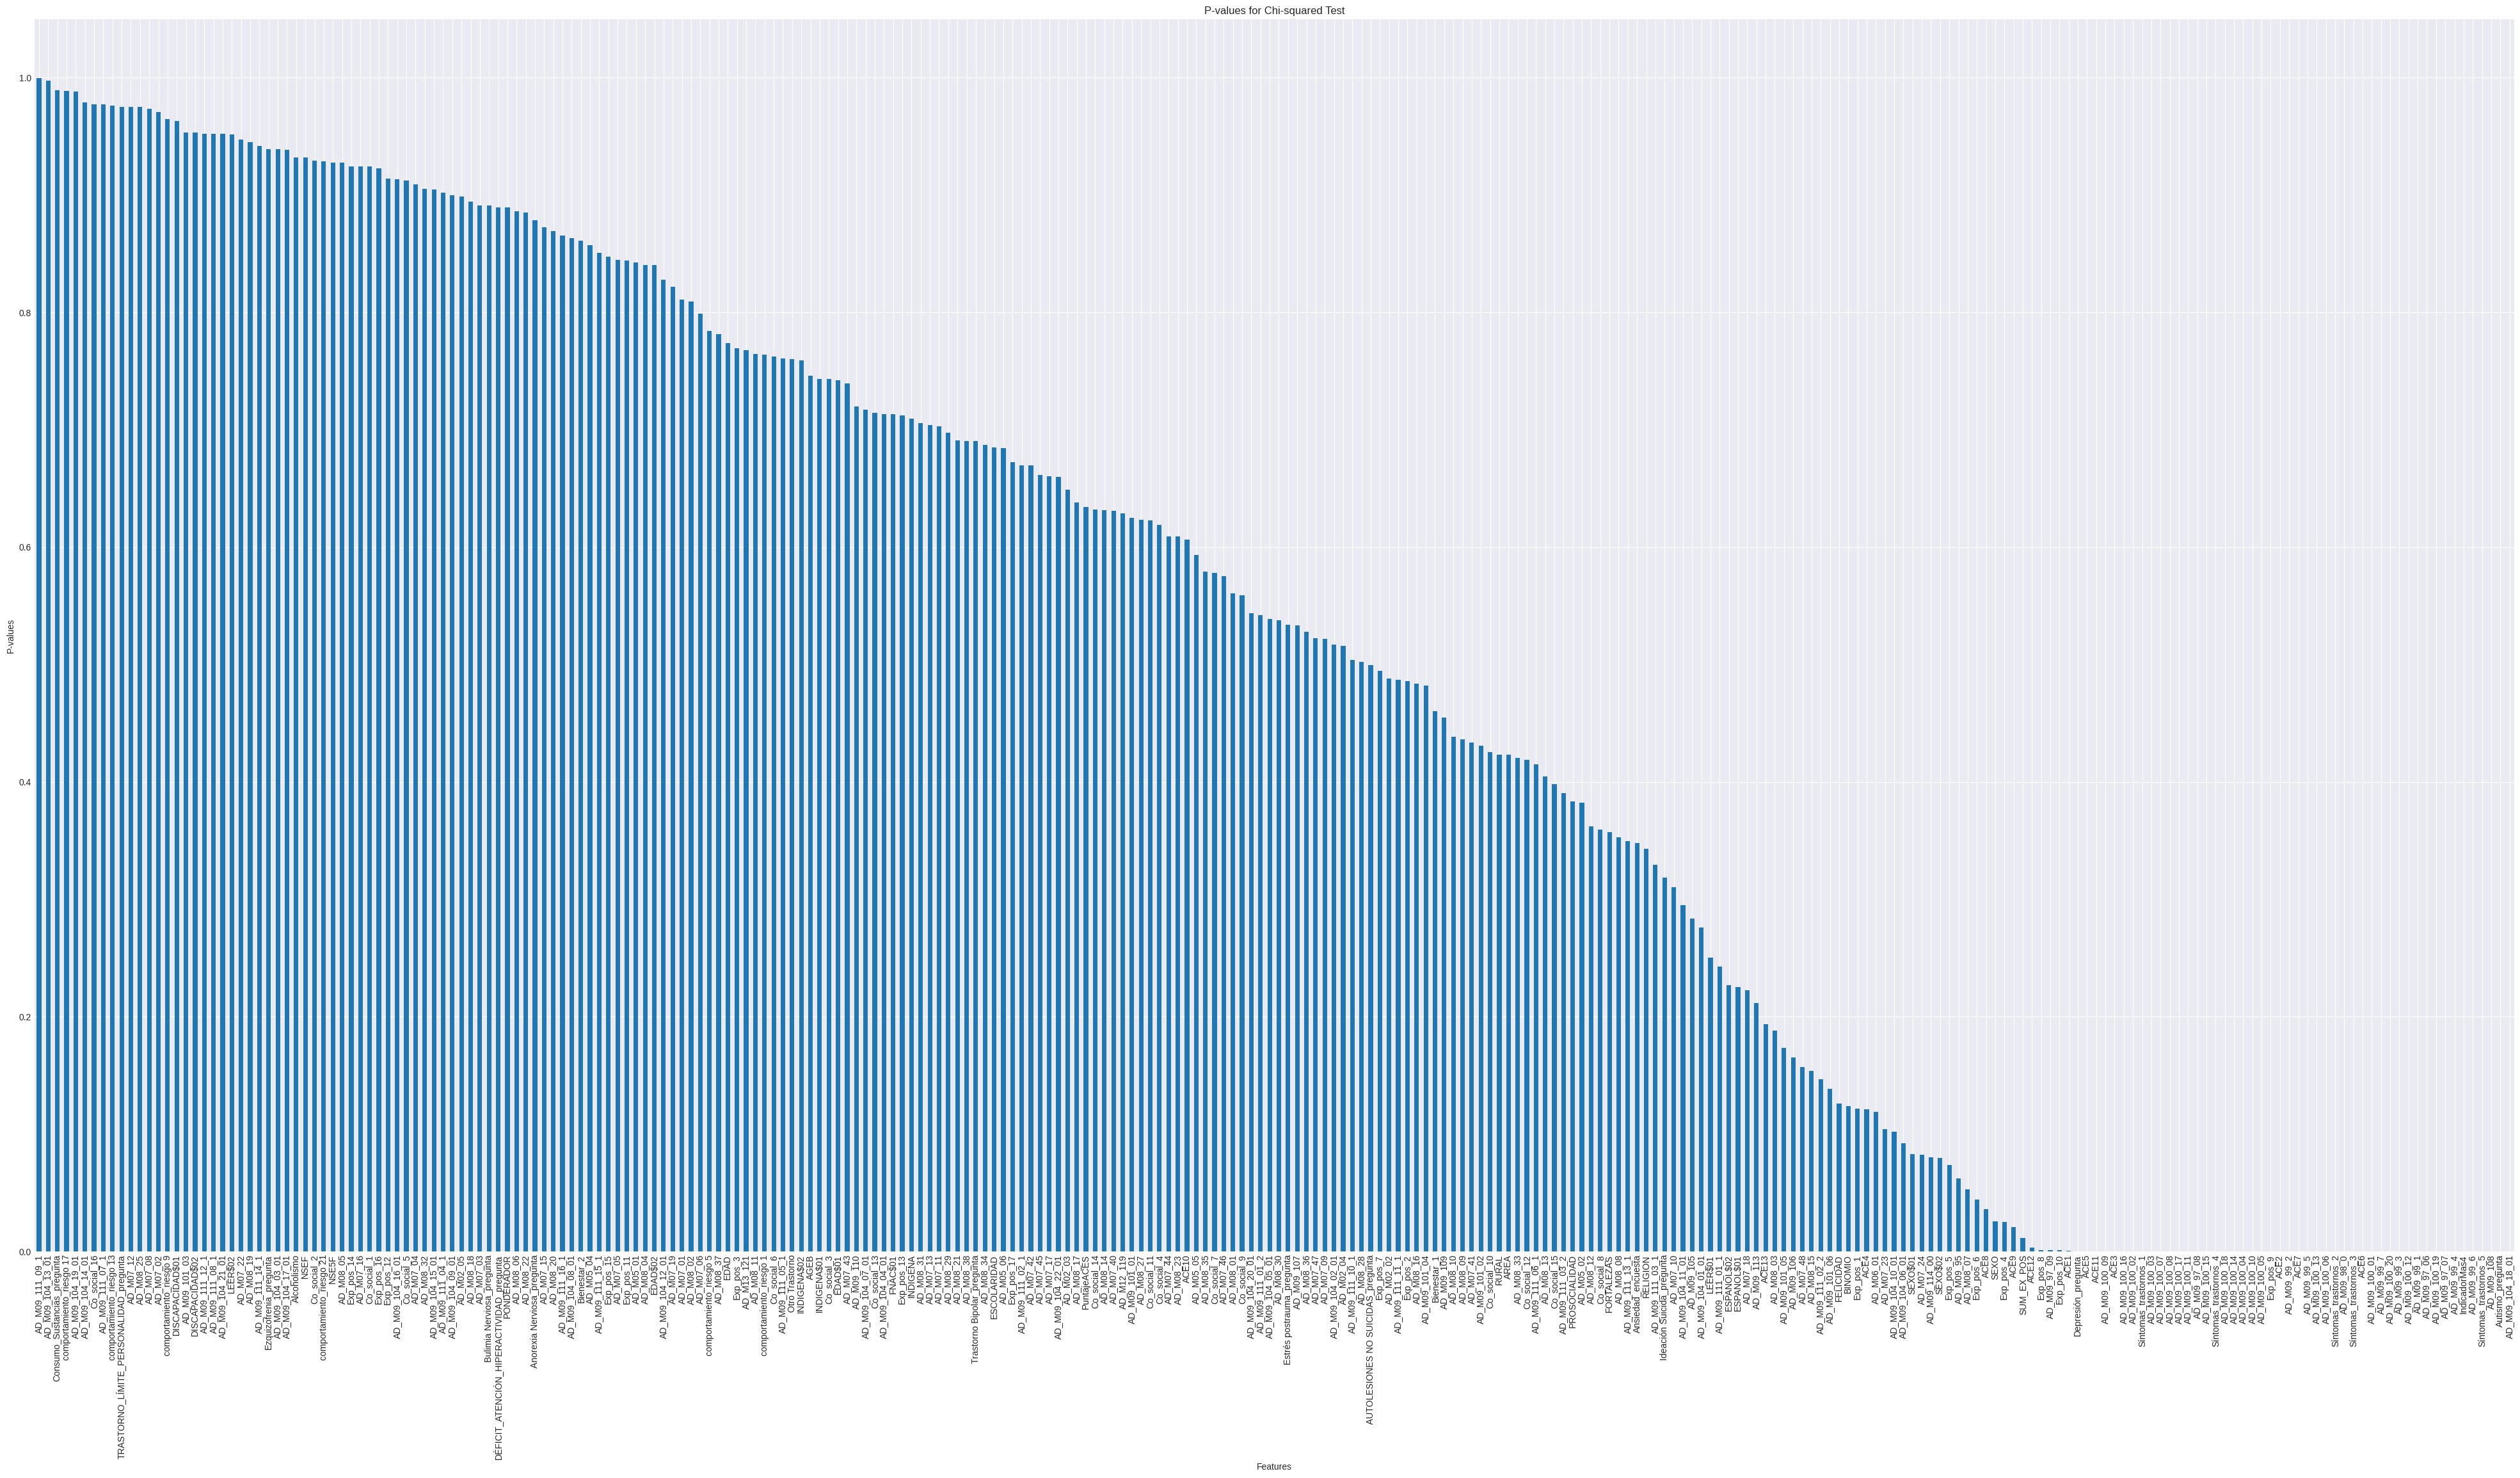

In [ ]:
# Creamos una visualización de todas las variablesmde entrada con su p-value

p_values = p_values.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(50, 25))

# Plot the p_values for y_train_enc.iloc[:,0] (1st target)
p_values.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Features')
ax.set_ylabel('P-values')
ax.set_title('P-values for Chi-squared Test')

# Show the plot
plt.show()

#p_values.plot.bar()

In [90]:
# Vemos la reducción en la dimensionalidad después de la prueba de dependencia Chi-Square

df_adultos_new = pd.concat([df_adultos_new[filtered_lst], df_adultos_new[target_lst]], axis=1)

print("Dimensiones de variables antes de Chi-Squared: ",df_adultos_original.shape[1])
print("Dimensiones de variables después de Chi-Squared: ",df_adultos[filtered_lst].shape[1])


Dimensiones de variables antes de Chi-Squared:  689
Dimensiones de variables después de Chi-Squared:  76


In [91]:
filtered_lst

['AD_M09_111_02_2',
 'AD_M09_100_14',
 'AD_M09_100_19',
 'AD_M09_100_11',
 'AD_M09_99_7',
 'AD_M09_100_06',
 'AD_M09_100_13',
 'Exp_pos_10',
 'ACE4',
 'AD_M09_97_07',
 'SUM_EX_POS',
 'Síntomas_trastornos_1',
 'AD_M09_101_06',
 'FORTALEZAS',
 'AD_M09_100_02',
 'Síntomas_trastornos_5',
 'Ansiedad_encuesta',
 'IndicadorMas4',
 'AD_M09_100_01',
 'AD_M09_100_12',
 'ACE6',
 'AD_M09_111_01_1',
 'AD_M09_99_1',
 'AD_M09_100_03',
 'Exp_pos_9',
 'AD_M09_99_5',
 'ACE8',
 'AD_M09_100_15',
 'AD_M09_100_16',
 'AD_M09_100_17',
 'AD_M09_100_04',
 'AD_M07_23',
 'ACE3',
 'AD_M09_100_20',
 'ACE2',
 'Exp_pos_1',
 'AD_M09_100_05',
 'ACE9',
 'AD_M09_97_08',
 'AD_M09_100_08',
 'SEXO$01',
 'AD_M09_100_18',
 'BINOMIO',
 'ACE11',
 'ACE13',
 'AD_M09_100_07',
 'AD_M09_97_09',
 'AD_M09_100_09',
 'ACE1',
 'AD_M09_99_3',
 'Exp_pos_4',
 'Exp_pos_8',
 'Síntomas_trastornos_4',
 'Síntomas_trastornos_2',
 'ACE5',
 'AD_M09_108',
 'AD_M08_11',
 'AD_M09_97_06',
 'AD_M09_98_0',
 'ACE7',
 'ACE12',
 'SEXO',
 'AD_M09_99_6',
 'AD

# Canalizaciones para preprocesamiento

In [92]:
# Creamos una función para seleccionar columnas

def make_column_selector(X, dtype_include):
  X_new = X.select_dtypes(include=dtype_include)
  return X_new.columns

In [93]:
# Agregamos todas las transformaciones a variables de entrada:

cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                 ('median_Enc', MeanEncoder(ignore_format=True)),
                                 ('escalaCat', MinMaxScaler(feature_range=(0,1)))
                                 ])

num_pipeline = Pipeline(steps = [('impMedian', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(0,1)))
                                 ])

cat_pipeline_nombres = make_column_selector(df_adultos_new.drop(columns=target_lst),object)
num_nombres = make_column_selector(df_adultos_new.drop(columns=target_lst),np.number)

# Conjuntamos las transformaciones numéricas que se estarán aplicando a los datos de entrada:
columnasTransformerX = ColumnTransformer(transformers = [('Xcatpipe', cat_pipeline, cat_pipeline_nombres),
                                                        ('Xnumpipe', num_pipeline, num_nombres)],
                                        remainder='passthrough')

In [94]:
# Transformaciones a variables de salida:
y_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])

y_pipeline_nombres = target_lst

# Conjuntamos las transformaciones numéricas que se estarán aplicando a los datos de entrada:
columnasTransformerY = ColumnTransformer(transformers = [('ypipe', y_pipeline, y_pipeline_nombres)],
                                      remainder='passthrough')

# Definición de X, y

In [95]:
y = df_adultos_new[target_lst]

y = y.astype(int) # Convertimos todas las clases de salida a int para facilitar el procesamiento

In [96]:
# Verificamos que en los datos transformados no haya valores faltantes
transformed_Y = columnasTransformerY.fit_transform(y)
Ytransformed_df_full = pd.DataFrame(transformed_Y, columns= target_lst)#columnasTransformerY.get_feature_names_out())#
Ytransformed_df_full.isnull().mean()

DEPRESION                          0.0
ANSIEDAD                           0.0
TRANSTORNO_ESTRES POSTRAUMÁTICO    0.0
SOSPECHA DE ANOREXIA/BULIMIA       0.0
dtype: float64

In [97]:
# Definimos nuestra nueva X con las variables seleccionadas

X = df_adultos[filtered_lst]
y = Ytransformed_df_full

In [98]:
# Definimos nuestros conjuntos de entrenamiento, prueba y validación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [99]:
# Hacemos un conteo de las variables únicas por conjunto de datos
print('Tabla de categorías únicas por variables categóricas \n')
tabla =[]
for x in cat_pipeline_nombres:
  tabla.append([x, X_train[x].nunique()])

print(tabulate(list(tabla),
        headers=["Variable", 'Categorías únicas'],
        tablefmt="github",
        floatfmt=".2f"
        ) ,'\n')

# Vemos que ninguna variable categórica fue seleccionada

Tabla de categorías únicas por variables categóricas 

| Variable   | Categorías únicas   |
|------------|---------------------| 



In [100]:
# Hacemos un conteo de las variables únicas por conjunto de datos
print('Tabla de categorías únicas por variables numéricas \n')
tabla =[]
for x in num_nombres:
#  print(f'{x}: {data[x].nunique()}')
  tabla.append([x, X_train[x].nunique()])

print(tabulate(list(tabla),
        headers=["Variable", 'Valores únicos'],
        tablefmt="github",
        floatfmt=".2f"
        ) ,'\n')



Tabla de categorías únicas por variables numéricas 

| Variable              |   Valores únicos |
|-----------------------|------------------|
| AD_M09_111_02_2       |                3 |
| AD_M09_100_14         |                5 |
| AD_M09_100_19         |                5 |
| AD_M09_100_11         |                5 |
| AD_M09_99_7           |                4 |
| AD_M09_100_06         |                5 |
| AD_M09_100_13         |                5 |
| Exp_pos_10            |                2 |
| ACE4                  |                2 |
| AD_M09_97_07          |                4 |
| SUM_EX_POS            |               16 |
| Síntomas_trastornos_1 |                4 |
| AD_M09_101_06         |                2 |
| FORTALEZAS            |               29 |
| AD_M09_100_02         |                5 |
| Síntomas_trastornos_5 |                4 |
| Ansiedad_encuesta     |                2 |
| IndicadorMas4         |                2 |
| AD_M09_100_01         |                5 |
| 

# Canalización de las transformaciones en las variables independientes


In [101]:
# Definimos una canalización para las variables de entrada

preprocessingX = make_column_transformer((columnasTransformerX, list(X_train.columns)))
preprocessingX.fit(df_adultos_new.astype(object), df_adultos_new[target_lst[0]]) # MeanEncoder requiere a y para determinar el promedio del target

ColumnTransformer(transformers=[('columntransformer',
                                 ColumnTransformer(remainder='passthrough',
                                                   transformers=[('Xcatpipe',
                                                                  Pipeline(steps=[('impModa',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('median_Enc',
                                                                                   MeanEncoder(ignore_format=True)),
                                                                                  ('escalaCat',
                                                                                   MinMaxScaler())]),
                                                                  Index([], dtype='object')),
                                                                 ('Xnumpipe',
                                                                  Pipeline(steps=[('impMedian',
                                                                                   SimpleImputer(st...
                                  'AD_M09_100_13', 'Exp_pos_10', 'ACE4',
                                  'AD_M09_97_07', 'SUM_EX_POS',
                                  'Síntomas_trastornos_1', 'AD_M09_101_06',
                                  'FORTALEZAS', 'AD_M09_100_02',
                                  'Síntomas_trastornos_5', 'Ansiedad_encuesta',
                                  'IndicadorMas4', 'AD_M09_100_01',
                                  'AD_M09_100_12', 'ACE6', 'AD_M09_111_01_1',
                                  'AD_M09_99_1', 'AD_M09_100_03', 'Exp_pos_9',
                                  'AD_M09_99_5', 'ACE8', 'AD_M09_100_15',
                                  'AD_M09_100_16', 'AD_M09_100_17', ...])])

In [102]:
# Integramos en un pipeline todas las transormaciones, balanceos, reducciones de
# dimensionalidad y el modelo de clasificación

base_model = RandomForestClassifier(random_state=42)

master_pipe = make_pipeline(preprocessingX,
                        #SimpleImputer(strategy='most_frequent'),
                        #RandomUnderSampler(sampling_strategy=0.8, random_state=42),
                        RandomOverSampler(sampling_strategy='minority',random_state=42),
                            PCA(random_state=42, n_components=0.95, svd_solver="full"),
                            base_model)

master_pipe.fit(X_train.astype(object), y_train.iloc[:,0])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('columntransformer',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('Xcatpipe',
                                                                                   Pipeline(steps=[('impModa',
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('median_Enc',
                                                                                                    MeanEncoder(ignore_format=True)),
                                                                                                   ('escalaCat',
                                                                                                    MinMaxScaler())]),
                                                                                   Index([], dtype='object')),
                                                                                  ('Xnumpipe',
                                                                                   Pipeline...
                                                   'AD_M09_111_01_1',
                                                   'AD_M09_99_1',
                                                   'AD_M09_100_03', 'Exp_pos_9',
                                                   'AD_M09_99_5', 'ACE8',
                                                   'AD_M09_100_15',
                                                   'AD_M09_100_16',
                                                   'AD_M09_100_17', ...])])),
                ('randomoversampler',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='minority')),
                ('pca',
                 PCA(n_components=0.95, random_state=42, svd_solver='full')),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [103]:
# Verificamos que las canalizaciones funcionen correctamente con un modelo de prueba

predictions = master_pipe.predict(X_test)
score = recall_score(y_test.iloc[:,1], predictions, average='weighted')
score

0.8299319727891157

# Resultado de balanceo de clases de salida

In [ ]:
# Verificamos el balanceo de las clases

sampler = master_pipe.named_steps['randomoversampler'] # Extraemos el objeto creado dentro del pipeline para el balanceo

# Hacemos el balanceo en una copia del conjunto de entrenamiento
Xr, y1 = sampler.fit_resample(X_train, y_train['TRANSTORNO_ESTRES POSTRAUMÁTICO'])
Xr, y2 = sampler.fit_resample(X_train, y_train['SOSPECHA DE ANOREXIA/BULIMIA'])
Xr, y3 = sampler.fit_resample(X_train, y_train['DEPRESION'])
Xr, y4 = sampler.fit_resample(X_train, y_train['ANSIEDAD'])
data = pd.concat([Xr, y1, y2, y3, y4], axis=1)#y_data[['DEPRESION','ANSIEDAD']]], axis=1)


In [ ]:
# Definimos a nuestro nuevo y nuevamente como una copia de los datos

y_rs = data[['DEPRESION',	'ANSIEDAD','TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA']]

In [ ]:
# Hacemos un conteo de los elementos por categoría en las clases de salida,
# Vemos que ahora todas las clases están balanceadas.

for col in y_rs:
  print(y_rs[col].value_counts())

0.0    673
1.0    673
Name: DEPRESION, dtype: int64
0.0    726
1.0    726
Name: ANSIEDAD, dtype: int64
0    938
1    938
Name: TRANSTORNO_ESTRES POSTRAUMÁTICO, dtype: int64
1.0    767
0.0    767
Name: SOSPECHA DE ANOREXIA/BULIMIA, dtype: int64


# Variables utilizadas con la reducción de dimensionalidad

In [ ]:
def plot_variance(pca, width=10, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=10, dpi=100)
    return axs

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

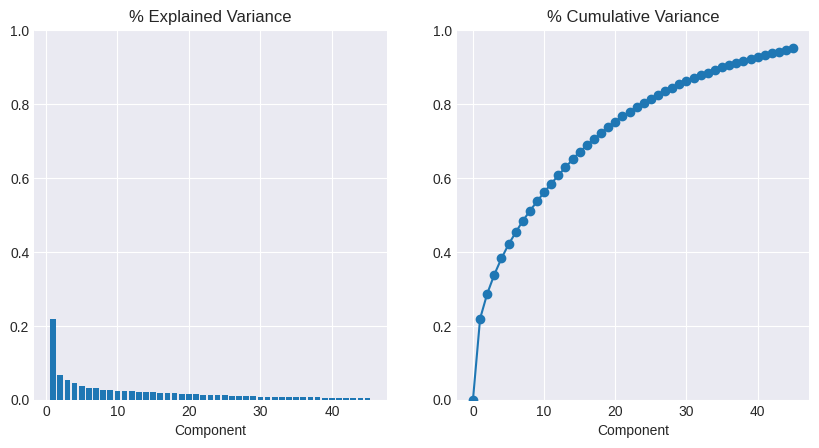

In [ ]:
# Vemos la varianza explicada por los componentes seleccionados por PCA:

pca = master_pipe.named_steps['pca']
plot_variance(pca)

In [ ]:
# Vemos el número de variables que utiliza el pipeline máster, mismas que
# resultaron de aplicar el filtrado con Chi-Square:

print(f'Número de componentes utilizados en Pipeline: {len(pca.components_)}')


Número de componentes utilizados en Pipeline: 45


# Selección del modelo de clasificación

Utilizamos diversos modelos de clasificación binaria tanto individuales como de tipo ensamble sobre cada una de las variables de salida de manera independiente, es decir, en este punto no estamos obteniendo resultados simultáneamente sobre todos los padecimientos en cada predicción a manera de obtener un modelo base que nos permita un ajuste fino posterior.

In [104]:
# Primero definimos una función para actualizar nuestro pipeline con el modelo deseado:

def update_model(model):
  master_pipe = make_pipeline(preprocessingX,
                        SimpleImputer(strategy='most_frequent'),
                        RandomUnderSampler(sampling_strategy=0.8, random_state=42),
                        RandomOverSampler(sampling_strategy='minority',random_state=42),
                            PCA(random_state=42, n_components=0.95, svd_solver="full"),
                            model)
  master_pipe.fit(X_train.astype(object), y_train.iloc[:,0])
  return master_pipe

**Voting Classifier**

In [ ]:
base_model = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)

updated_pipe = update_model(base_model)
#master_pipe.fit(X_train, y_train.iloc[:,1])

In [ ]:
# Verificamos la métrica de interés en cada target con el nuevo modelo base:

for i in range(len(y.columns)):
  updated_pipe.fit(X_train, y_train.iloc[:,i].astype(int))
  prediction = updated_pipe.predict(X_test)
  recall = recall_score(y_test.iloc[:,i],prediction)
  print(f'Recall for {y.columns[i]}: {recall:.2f}')

Recall for DEPRESION: 0.74
Recall for ANSIEDAD: 0.68
Recall for TRANSTORNO_ESTRES POSTRAUMÁTICO: 0.77
Recall for SOSPECHA DE ANOREXIA/BULIMIA: 0.17


In [ ]:
# Vemos que el pipeline esté utilizando el nuevo modelo
updated_pipe.steps[5]

('votingclassifier',
 VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                              ('rf', RandomForestClassifier(random_state=42)),
                              ('svc', SVC(random_state=42))]))

# Estrategias Blending

In [ ]:
# Establecemos el nuevo modelo base

base_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True,
                            max_samples=100, n_jobs=-1, random_state=42)
updated_pipe = update_model(base_model)

# Verificamos la métrica de interés en cada target con el nuevo modelo base:

for i in range(len(y.columns)):
  updated_pipe.fit(X_train, y_train.iloc[:,i])
  prediction = updated_pipe.predict(X_test)
  recall = recall_score(y_test.iloc[:,i],prediction)
  print(f'Recall for {y.columns[i]}: {recall:.2f}')

Recall for DEPRESION: 0.89
Recall for ANSIEDAD: 0.88
Recall for TRANSTORNO_ESTRES POSTRAUMÁTICO: 0.85
Recall for SOSPECHA DE ANOREXIA/BULIMIA: 0.54


# Búsqueda de parámetros óptimos para los mejores modelos

Por los resultados preliminares que se obtuvieron en los modelos base de tipo ensamble, el desempeño más pobre se está teniendo en SOSPECHA DE ANOREXIA/BULIMIA, por lo que estaremos ajustando todos los modelos para ese target en específico.

**AdaBoostClassifier**

In [ ]:
base_model = AdaBoostClassifier()

updated_pipe = update_model(base_model)

# Hacemos la búsqueda de parámetros óptimos con el nuevo modelo base:


params = {
    'adaboostclassifier__n_estimators': [50, 60, 80],
    'adaboostclassifier__learning_rate': [1,0.1,0.001],
    'adaboostclassifier__algorithm': ['SAMME', 'SAMME.R']
}

gs_ada = GridSearchCV(updated_pipe,
                      param_grid=params,
                      scoring='recall',
                      cv=5,
                     return_train_score=True,
                     error_score ='raise',
                     n_jobs=-1)

gs_ada.fit(X_train, y_train['SOSPECHA DE ANOREXIA/BULIMIA'])

#Time elapsed: 4m 15s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('columntransformer',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('Xcatpipe',
                                                                                                          Pipeline(steps=[('impModa',
                                                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                                                          ('median_Enc',
                                                                                                                           MeanEncoder(ignore_format=True)),
                                                                                                                          ('escalaCat',
                                                                                                                           MinMaxScaler())]...
                                                          sampling_strategy='minority')),
                                       ('pca',
                                        PCA(n_components=0.95, random_state=42,
                                            svd_solver='full')),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'adaboostclassifier__algorithm': ['SAMME', 'SAMME.R'],
                         'adaboostclassifier__learning_rate': [1, 0.1, 0.001],
                         'adaboostclassifier__n_estimators': [50, 60, 80]},
             return_train_score=True, scoring='recall')

In [ ]:
gs_ada.best_params_

{'adaboostclassifier__algorithm': 'SAMME.R',
 'adaboostclassifier__learning_rate': 0.1,
 'adaboostclassifier__n_estimators': 60}

In [105]:
# Creamos un objecto para el mejor modelo

ada_tuned = AdaBoostClassifier(algorithm='SAMME',
                                     learning_rate=0.1,
                                     n_estimators=60,
                               random_state=42)

**XGBoost**

In [ ]:
base_model = xgb.XGBClassifier()

updated_pipe = update_model(base_model)

# Hacemos la búsqueda de parámetros óptimos con el nuevo modelo base:

params = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5]
        }

gs_xgb_clf = GridSearchCV(updated_pipe,
                      param_grid=params,
                      scoring='recall',
                      cv=5,
                     return_train_score=True,
                     error_score ='raise',
                     n_jobs=-1)

gs_xgb_clf.fit(X_train.astype('object'), y_train['SOSPECHA DE ANOREXIA/BULIMIA'])

#Time elapsed: 26m 53s

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('columntransformer',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('Xcatpipe',
                                                                                                          Pipeline(steps=[('impModa',
                                                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                                                          ('median_Enc',
                                                                                                                           MeanEncoder(ignore_format=True)),
                                                                                                                          ('escalaCat',
                                                                                                                           MinMaxScaler())]...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
                         'xgbclassifier__max_depth': [3, 4, 5],
                         'xgbclassifier__min_child_weight': [1, 5, 10],
                         'xgbclassifier__subsample': [0.6, 0.8, 1.0]},
             return_train_score=True, scoring='recall')

In [ ]:
base_model = xgb.XGBRFClassifier()

updated_pipe = update_model(base_model)

# Hacemos la búsqueda de parámetros óptimos con el nuevo modelo base:

params = {
        'xgbrfclassifier__min_child_weight': [1, 5, 10],
        'xgbrfclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbrfclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbrfclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbrfclassifier__max_depth': [3, 4, 5]
        }

gs_xgb_clf = GridSearchCV(updated_pipe,
                      param_grid=params,
                      scoring='recall',
                      cv=5,
                     return_train_score=True,
                     error_score ='raise',
                     n_jobs=-1)

gs_xgb_clf.fit(X_train.astype('object'), y_train['SOSPECHA DE ANOREXIA/BULIMIA'])

#Time elapsed: 26m 53s

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('columntransformer',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('Xcatpipe',
                                                                                                          Pipeline(steps=[('impModa',
                                                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                                                          ('median_Enc',
                                                                                                                           MeanEncoder(ignore_format=True)),
                                                                                                                          ('escalaCat',
                                                                                                                           MinMaxScaler())]...
                                                        num_parallel_tree=None,
                                                        objective='binary:logistic',
                                                        random_state=None,
                                                        reg_alpha=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbrfclassifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgbrfclassifier__gamma': [0.5, 1, 1.5, 2, 5],
                         'xgbrfclassifier__max_depth': [3, 4, 5],
                         'xgbrfclassifier__min_child_weight': [1, 5, 10],
                         'xgbrfclassifier__subsample': [0.6, 0.8, 1.0]},
             return_train_score=True, scoring='recall')

In [ ]:
gs_xgb_clf.best_params_

{'xgbclassifier__colsample_bytree': 1.0,
 'xgbclassifier__gamma': 5,
 'xgbclassifier__max_depth': 4,
 'xgbclassifier__min_child_weight': 10,
 'xgbclassifier__subsample': 1.0}

In [ ]:
gs_xgb_clf.best_params_

{'xgbrfclassifier__colsample_bytree': 0.6,
 'xgbrfclassifier__gamma': 0.5,
 'xgbrfclassifier__max_depth': 3,
 'xgbrfclassifier__min_child_weight': 1,
 'xgbrfclassifier__subsample': 1.0}

In [106]:
# Creamos un objecto para el mejor modelo

xgb_clf_tuned = xgb.XGBClassifier(colsample_bytree=1,
                                    min_child_weight= 10,
                                    max_depth=4,
                                    subsample=1,
                                    gamma=5,
                                    random_state=42
                                    )

In [107]:
# Creamos un objecto para el mejor modelo

xgb_clf_tuned = xgb.XGBRFClassifier(colsample_bytree=0.6,
                                    min_child_weight= 1,
                                    max_depth=4,
                                    subsample=1,
                                    gamma=0.5,
                                    random_state=42
                                    )

**RandomForestClassifier**

In [ ]:
base_model = RandomForestClassifier(random_state=42)

updated_pipe = update_model(base_model)

# Hacemos la búsqueda de parámetros óptimos con el nuevo modelo base:

params = {
    'randomforestclassifier__n_estimators': [200, 500],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__max_depth' : [4,6,8],
    'randomforestclassifier__criterion' :['gini', 'entropy']}

gs_RF = GridSearchCV(updated_pipe,
                      param_grid=params,
                      scoring='recall',
                      cv=5,
                     return_train_score=True,
                     error_score ='raise',
                     n_jobs=-1)

gs_RF.fit(X_train.astype('object'), y_train['SOSPECHA DE ANOREXIA/BULIMIA'])

#Time elapsed: 5m 25s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('columntransformer',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('Xcatpipe',
                                                                                                          Pipeline(steps=[('impModa',
                                                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                                                          ('median_Enc',
                                                                                                                           MeanEncoder(ignore_format=True)),
                                                                                                                          ('escalaCat',
                                                                                                                           MinMaxScaler())]...
                                            svd_solver='full')),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [4, 6, 8],
                         'randomforestclassifier__max_features': ['auto',
                                                                  'sqrt',
                                                                  'log2'],
                         'randomforestclassifier__n_estimators': [200, 500]},
             return_train_score=True, scoring='recall')

In [ ]:
gs_RF.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 8,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__n_estimators': 200}

In [108]:
# Creamos un objecto para el mejor modelo

rf_tuned = RandomForestClassifier(criterion='gini',
                                        max_depth=8,
                                        max_features='auto',
                                        n_estimators= 200,
                                  random_state=42)

In [ ]:

base_model = BaggingClassifier(DecisionTreeClassifier())

updated_pipe = update_model(base_model)
updated_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('columntransformer',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('Xcatpipe',
                                                                                   Pipeline(steps=[('impModa',
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('median_Enc',
                                                                                                    MeanEncoder(ignore_format=True)),
                                                                                                   ('escalaCat',
                                                                                                    MinMaxScaler())]),
                                                                                   Index([], dtype='object')),
                                                                                  ('Xnumpipe',
                                                                                   Pipeline...
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.8)),
                ('randomoversampler',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='minority')),
                ('pca',
                 PCA(n_components=0.95, random_state=42, svd_solver='full')),
                ('baggingclassifier',
                 BaggingClassifier(estimator=DecisionTreeClassifier()))])

**Bagging Classifier**

In [ ]:

base_model = BaggingClassifier(DecisionTreeClassifier())

updated_pipe = update_model(base_model)

# Hacemos la búsqueda de parámetros óptimos con el nuevo modelo base:
# Hicimos dos iteraciones, una para el modelo DecisionTreeClassifier base y
# Otra para el "parent model"

params = {'baggingclassifier__n_estimators' : [10,15,20],
          'baggingclassifier__max_features':[1,3,5],
          'baggingclassifier__max_samples':[100,150,200]}
     #     'model__base_estimator__class_weight':['balanced',None],
     #     'model__base_estimator__criterion':['gini', 'entropy', 'log_loss'],
      #    'model__base_estimator__max_depth':[1,2,3,4,5,None],
      #    'model__base_estimator__ccp_alpha':[1,0.1,.01],
       #   'model__base_estimator__max_features':[50,100,300,500],
        #  'model__base_estimator__max_leaf_nodes':[2,5,10]}


bag_pipe = GridSearchCV(updated_pipe,
                      param_grid=params,
                      scoring='recall',
                      cv=5,
                     return_train_score=True,
                     error_score ='raise',
                     n_jobs=-1)

bag_pipe.fit(X_train, y_train['SOSPECHA DE ANOREXIA/BULIMIA'])

#Time elapsed: 1hr 36 min


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('columntransformer',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('Xcatpipe',
                                                                                                          Pipeline(steps=[('impModa',
                                                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                                                          ('median_Enc',
                                                                                                                           MeanEncoder(ignore_format=True)),
                                                                                                                          ('escalaCat',
                                                                                                                           MinMaxScaler())]...
                                                          sampling_strategy='minority')),
                                       ('pca',
                                        PCA(n_components=0.95, random_state=42,
                                            svd_solver='full')),
                                       ('baggingclassifier',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))]),
             n_jobs=-1,
             param_grid={'baggingclassifier__max_features': [1, 3, 5],
                         'baggingclassifier__max_samples': [100, 150, 200],
                         'baggingclassifier__n_estimators': [10, 15, 20]},
             return_train_score=True, scoring='recall')

In [ ]:
# Mejores parámetros para el árbol de desición como modelo base de Bagging Classifier

bag_pipe.best_params_

{'model__base_estimator__ccp_alpha': 0.01,
 'model__base_estimator__class_weight': 'balanced',
 'model__base_estimator__criterion': 'log_loss',
 'model__base_estimator__max_depth': 4,
 'model__base_estimator__max_features': 100,
 'model__base_estimator__max_leaf_nodes': 5}

In [ ]:
# Mejores parámetros para nuestro "parent model"

bag_pipe.best_params_

{'baggingclassifier__max_features': 1,
 'baggingclassifier__max_samples': 100,
 'baggingclassifier__n_estimators': 15}

In [109]:
# Creamos un objecto para el mejor modelo

bag_tuned = BaggingClassifier(DecisionTreeClassifier(class_weight ='balanced',
                                    criterion = 'log_loss',
                                    max_depth = 4,
                                    ccp_alpha=0.01,
                                    max_features = 100,
                                    max_leaf_nodes = 5,
                                                     random_state=42),
                              max_features=1,
                              max_samples=100,
                              n_estimators=15,
                              random_state=42)


**Regresión Logística**

In [ ]:
base_model = LogisticRegression(random_state=42)

updated_pipe = update_model(base_model)

# Hacemos la búsqueda de parámetros óptimos con el nuevo modelo base:


params = {'logisticregression__solver':['saga','sag'],
          'logisticregression__C':[0.01, 0.1, 1.0],
           'logisticregression__class_weight':['balanced',None],
           'logisticregression__max_iter':[300,500]}

best_param = []

gs_LR = GridSearchCV(updated_pipe,
                      param_grid=params,
                      scoring='recall',
                      cv=5,
                     return_train_score=True,
                     error_score ='raise',
                     n_jobs=-1)

gs_LR.fit(X_train, y_train['SOSPECHA DE ANOREXIA/BULIMIA'])

#Time elapsed: 1hr 36 min


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('columntransformer',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('Xcatpipe',
                                                                                                          Pipeline(steps=[('impModa',
                                                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                                                          ('median_Enc',
                                                                                                                           MeanEncoder(ignore_format=True)),
                                                                                                                          ('escalaCat',
                                                                                                                           MinMaxScaler())]...
                                        PCA(n_components=0.95, random_state=42,
                                            svd_solver='full')),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1.0],
                         'logisticregression__class_weight': ['balanced', None],
                         'logisticregression__max_iter': [300, 500],
                         'logisticregression__solver': ['saga', 'sag']},
             return_train_score=True, scoring='recall')

In [ ]:

gs_LR.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__max_iter': 300,
 'logisticregression__solver': 'saga'}

In [110]:
# Creamos un objecto para el mejor modelo

lr_tuned = LogisticRegression(C= 0.01,
                                 class_weight= 'balanced',
                                 max_iter= 300,
                                 solver= 'saga',
                                 random_state=42)

**SVC Classifier**

In [122]:
base_model= SVC()

updated_pipe = update_model(base_model)

# Hacemos la búsqueda de parámetros óptimos con el nuevo modelo base:

params = {'svc__C': [0.1,1, 10, 100], 'svc__gamma': [1,0.1,0.01,0.001],'svc__kernel': ['rbf', 'poly', 'sigmoid','linear']}

gs_SVC = GridSearchCV(updated_pipe,
                      param_grid=params,
                      scoring='precision',
                      cv=5,return_train_score=True,error_score ='raise')

gs_SVC.fit(X_train.astype('object'), y_train['SOSPECHA DE ANOREXIA/BULIMIA'])

# elapsed time: 4m 45s

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('columntransformer',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('Xcatpipe',
                                                                                                          Pipeline(steps=[('impModa',
                                                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                                                          ('median_Enc',
                                                                                                                           MeanEncoder(ignore_format=True)),
                                                                                                                          ('escalaCat',
                                                                                                                           MinMaxScaler())]...
                                                           sampling_strategy=0.8)),
                                       ('randomoversampler',
                                        RandomOverSampler(random_state=42,
                                                          sampling_strategy='minority')),
                                       ('pca',
                                        PCA(n_components=0.95, random_state=42,
                                            svd_solver='full')),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             return_train_score=True, scoring='precision')

In [123]:
gs_SVC.best_params_

{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'linear'}

In [ ]:
gs_SVC.best_params_

{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'sigmoid'}

In [124]:
# Creamos un objecto para el mejor modelo

svc_tuned = SVC(C=100,
                gamma= 0.001,
                kernel= 'linear',
                random_state=42)

# Comparación de modelos base y ajustados con los parámetros óptimos

In [125]:
def model_performance_classification(model, xtrain, ytrain, xtest, target):

    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables

    master_pipe = make_pipeline(preprocessingX,
                        #SimpleImputer(strategy='most_frequent'),
                        #RandomUnderSampler(sampling_strategy=0.8,random_state=42),
                        RandomOverSampler(sampling_strategy='minority',random_state=42),
                            PCA(random_state=42, n_components=0.95, svd_solver="full"),
                            model)


    master_pipe.fit(xtrain,ytrain)
    pred = master_pipe.predict(xtest)
    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    precision = precision_score(target, pred, average = 'macro')          # To compute precision
    f1 = f1_score(target, pred, average = 'macro')                        # To compute f1_score
    acc = accuracy_score(target, pred)                                    # To compute accuracy score

    # Creating a dataframe of metrics

    df_perf = pd.DataFrame({
        "Recall":  recall,
        "Precision":  precision,
        "Accuracy": acc,
        "F1_score": f1},
        index = [0])

    return df_perf

In [126]:
# Ejecutamos nuestra función que genera scores para cada modelo, utilizamos
# en particular el target SOSPECHA DE ANOREXIA/BULIMIA, ya que mostró los resultados más bajos

ada_base = AdaBoostClassifier(random_state=42)
xgb_base = xgb.XGBRFClassifier(random_state=42)
xgb_clf_base = xgb.XGBClassifier(random_state=42)
rf_base = RandomForestClassifier(random_state=42)
bag_base = BaggingClassifier(DecisionTreeClassifier(random_state=42),random_state=42)
svc_model = SVC(random_state=42)
lr_model = LogisticRegression(random_state=42)

lr_test = model_performance_classification(lr_model, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])
lr_tuned_test = model_performance_classification(lr_tuned, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])
svc_test = model_performance_classification(svc_model, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])
svc_tuned_test = model_performance_classification(svc_tuned, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])
bag_test = model_performance_classification(bag_base, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])
bag_tuned_test = model_performance_classification(bag_tuned, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])
rf_base_test = model_performance_classification(rf_base, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])
rf_tuned_test = model_performance_classification(rf_tuned, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])
ada_base_test = model_performance_classification(ada_base, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])
ada_tuned_test = model_performance_classification(ada_tuned, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])
xgb_clf_test = model_performance_classification(xgb_clf_base, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])
xgb__clf_tuned_test = model_performance_classification(xgb_clf_tuned, X_train, y_train.iloc[:,3], X_test, y_test.iloc[:,3])

In [127]:

models_test_comp_df = pd.concat([lr_test, lr_tuned_test, svc_test, svc_tuned_test, bag_test, bag_tuned_test, rf_base_test, rf_tuned_test, ada_base_test, ada_tuned_test, xgb_clf_test, xgb__clf_tuned_test ], axis = 0)

models_test_comp_df.index = ['Logistic Regression',
                             'Tuned Logistic Regression',
                             'SVC Classifier',
                             'Tuned SVC Classifier',
                             'Bagging Classifier',
                             'Tuned Bagging Classifier',
                             'Random Forest classifier',
                             'Tuned Random Forest classifier',
                             'AdaBoostClassifier',
                             'Tuned AdaBoostClassifier',
                             'XGBClassifier',
                             'Tuned XGBClassifier',
                             ]

print("Test performance comparison:")

models_test_comp_df.style.highlight_max(color = 'lightgreen', axis = 0)


Test performance comparison:


,Recall,Precision,Accuracy,F1_score
Logistic Regression,0.806337,0.757791,0.820862,0.774477
Tuned Logistic Regression,0.804497,0.759420,0.823129,0.775575
SVC Classifier,0.809005,0.790520,0.850340,0.798925
Tuned SVC Classifier,0.802713,0.784605,0.845805,0.792832
Bagging Classifier,0.679967,0.722770,0.800454,0.695385
Tuned Bagging Classifier,0.568820,0.549630,0.544218,0.512793
Random Forest classifier,0.729228,0.824606,0.850340,0.759534
Tuned Random Forest classifier,0.762825,0.791595,0.845805,0.775324
AdaBoostClassifier,0.758260,0.726980,0.798186,0.739003
Tuned AdaBoostClassifier,0.722010,0.660473,0.646259,0.625000


# Selección del mejor modelo

Basándonos solamente en sensibilidad, el modelo XGB Classifier ajustado con los parámetros óptimos resultó ser el mejor de todos, seguido muy de cerca por el modelo de Bagging Classifier. En la siguiente parte del código revisaremos los tiempos de entrenamiento y diagnóstico para verificar si hay diferencias significativas.

In [ ]:
# Probamos con cross_validate para usar métricas múltiples y verificar los tiempos de entrenamiento por modelo

scoring = ['accuracy','precision', 'recall', 'f1', 'f1_weighted']

# Escogemos los modelos con mejores resultados, tando individuales como de ensamble:

models = {
    'BaggingClassifier - Tuned': bag_tuned,
    'XGBClassifier - Tuned': xgb_clf_tuned,
    'Support Vector Machine - Tuned': svc_tuned,
    'Logistic Regression - Tuned': lr_tuned,
    'Random Forest classifier - Tuned': rf_tuned,
    'AdaBoostClassifier - Tuned': ada_tuned}

score_lst = []

#k = 5  # total de particiones (folds)
#kf = KFold(n_splits= k, shuffle=True)

# Aplicamos validación-cruzada mediante la evaluación de cada una de las k particiones:
#for train_index, val_index in kf.split(X):
#for name,model in models.items():
 # for i in range(len(y.columns)):

for name, model in models.items():

  master_pipe = make_pipeline(preprocessingX,
                  SimpleImputer(strategy='most_frequent'),
                  RandomUnderSampler(sampling_strategy=0.8),
                  RandomOverSampler(sampling_strategy='minority'),
                      PCA(random_state=42, n_components=0.95, svd_solver="full"),
                      model)

  for i in range(len(y.columns)):
    scores = cross_validate(master_pipe, X_train, y_train.iloc[:,i], scoring=scoring, cv=5, return_train_score=True)
    score_lst.append(scores)

# elapsed time: 16m 30s

In [ ]:
# Vemos los resultados incluyendo los tiempos de entrenamiento y diagnóstico de manera tabular.
# Esto en caso de que los expertos en el área quisieran revisar el desgloce por target.

tabla=[]

for x in range(len(list(models.keys()))):
  i = x*4
  for n in range(len(y_train.columns)):
    idx = n+i
    #for score in score_lst[idx]:
    tabla.append([list(models.keys())[x], y_train.columns[n],
                  np.mean(score_lst[idx]['fit_time']),
                  np.mean(score_lst[idx]['score_time']),
                  np.mean(score_lst[idx]['train_recall']),
                  np.mean(score_lst[idx]['test_recall']),
                  np.mean(score_lst[idx]['train_precision']),
                  np.mean(score_lst[idx]['test_precision']),
                  np.mean(score_lst[idx]['train_f1']),
                  np.mean(score_lst[idx]['test_f1'])
                  ])

print(tabulate(list(tabla)[-24:],
          headers=["Model", "Target",'fit time',
                   'score time',
                   'train_recall',
                   'test_recall',
                   'train_precision',
                   'test_precision',
                   'train_f1',
                   'test_f1'
],
          tablefmt="github",
          floatfmt=".2f"
          ) ,'\n')

| Model                            | Target                          |   fit time |   score time |   train_recall |   test_recall |   train_precision |   test_precision |   train_f1 |   test_f1 |
|----------------------------------|---------------------------------|------------|--------------|----------------|---------------|-------------------|------------------|------------|-----------|
| BaggingClassifier - Tuned        | DEPRESION                       |       0.20 |         0.04 |           0.83 |          0.79 |              0.53 |             0.51 |       0.65 |      0.62 |
| BaggingClassifier - Tuned        | ANSIEDAD                        |       0.21 |         0.04 |           0.85 |          0.81 |              0.50 |             0.47 |       0.63 |      0.59 |
| BaggingClassifier - Tuned        | TRANSTORNO_ESTRES POSTRAUMÁTICO |       0.21 |         0.04 |           0.70 |          0.35 |              0.27 |             0.13 |       0.39 |      0.19 |
| BaggingClassifier 

Se observa una mejora significativa como se esperaba con los modelos ajustados. Como se había comentado anteriormente, nuestro enfoque principal es de reducir los errores en la clase minoritaria, donde los FP implican que las personas con algún trastorno eran clasificados por el modelo con un diagnóstico negativo, por lo que la tasa de sensibilidad (recall) es nuestra métrica principal. Presición nos indica el desempeño únicamente de los FP y VP, por lo que también la incluímos, aunque su enfoque es más bien en reducir el error de diagnosticar a una persona con algún trastorno cuando no lo tiene.  Para tener una combinación de sensibilidad con presición también estamos incluyendo f1-score, que es la media armónica de ambas y nos da una buena idea del desempeño general de nuestro modelo en la clase positiva.

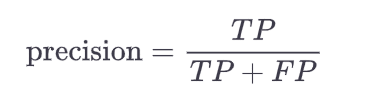

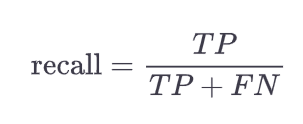

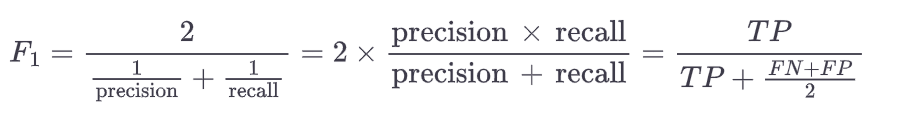


 Se observa que el target con el desempeño más bajo sigue siendo SOSPECHA DE ANOREXIA/BULIMIA, por lo que nuestra recomendación es aumentar las preguntas de la encuesta sobre esta categoría, ya que se observaron significativamente más preguntas sobre el resto de los padecimientos en las encuestas realizadas.

# Árbol de desición - Modelo XGBoost ajustado

In [ ]:
# Creamos visualizaciones para los árboles de desición por target

final_pipe = update_model(xgb_clf_tuned)

model = final_pipe.named_steps['xgbrfclassifier']


for i in range(len(y.columns)):
  model.fit(X_train, y_train.iloc[:,i])

  viz_model = dtreeviz.model(model,
                      X_train=X_train,
                      y_train=y_train.iloc[:, i],
                      feature_names=list(X_train.columns),
                      target_name=y.columns[i],
                      #class_names=y_train.columns[i],
                      tree_index=0)

  viz_model.view(orientation='TD',  # Set tree orientation to Top-Down
                      fancy=False,        # Disable fancy features for better performance
                      scale=1.5,          # Scale the text and nodes for better visibility
                      show_node_labels=True,  # Show node labels
                      title=f"Decision Tree Visualization for {y.columns[i]}",  # Set a title for the visualization
                      )
  v = viz_model.view()     # render as SVG into internal object
  v.save(f"decision_tree_{y.columns[i]}.svg") # save the viz to a separate per target

#Importancia de Características - Modelo XGB ajustado

In [116]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.5 MB/s eta 0:00:00


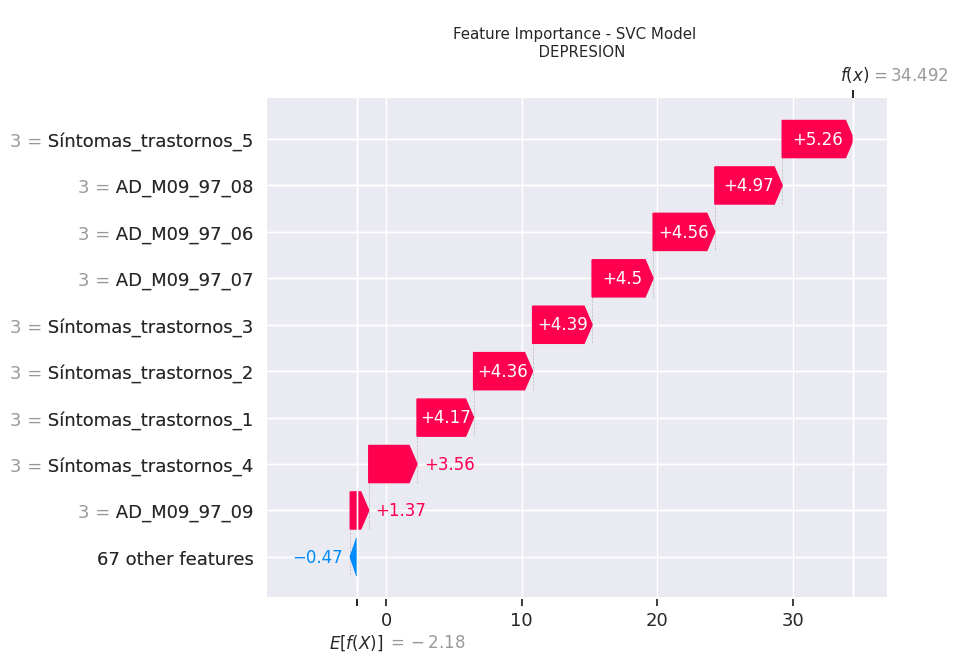

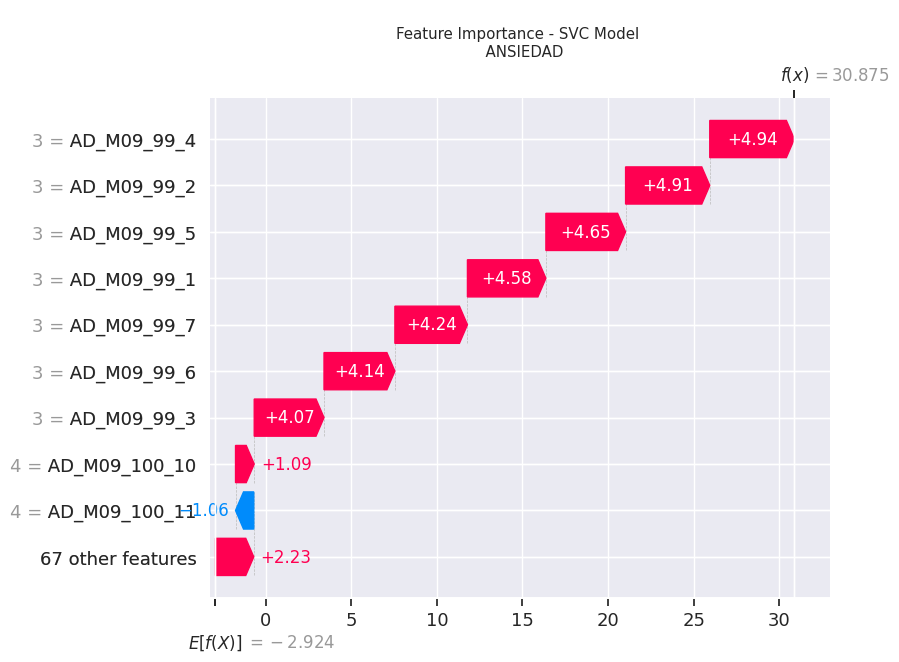

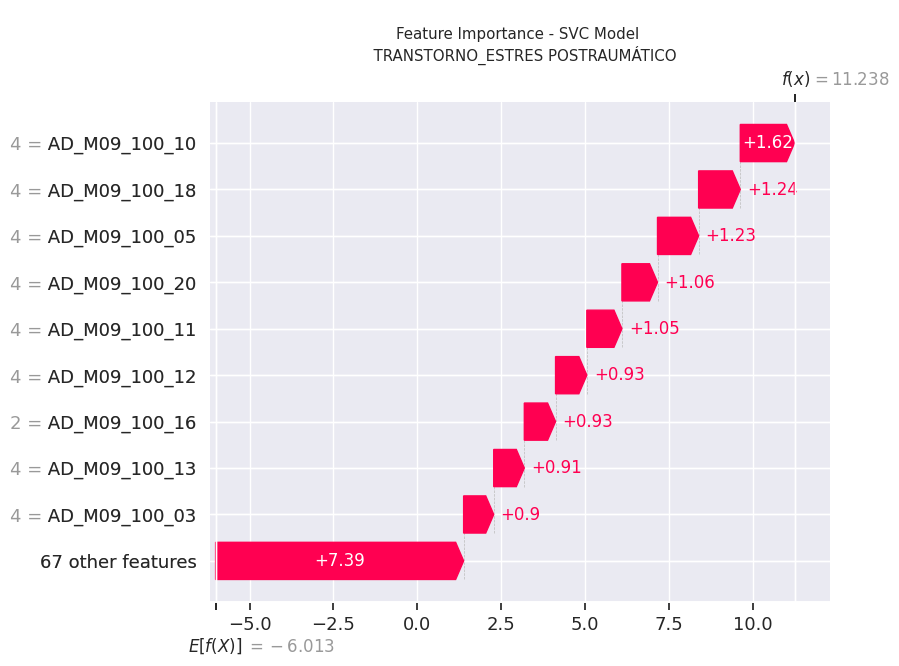

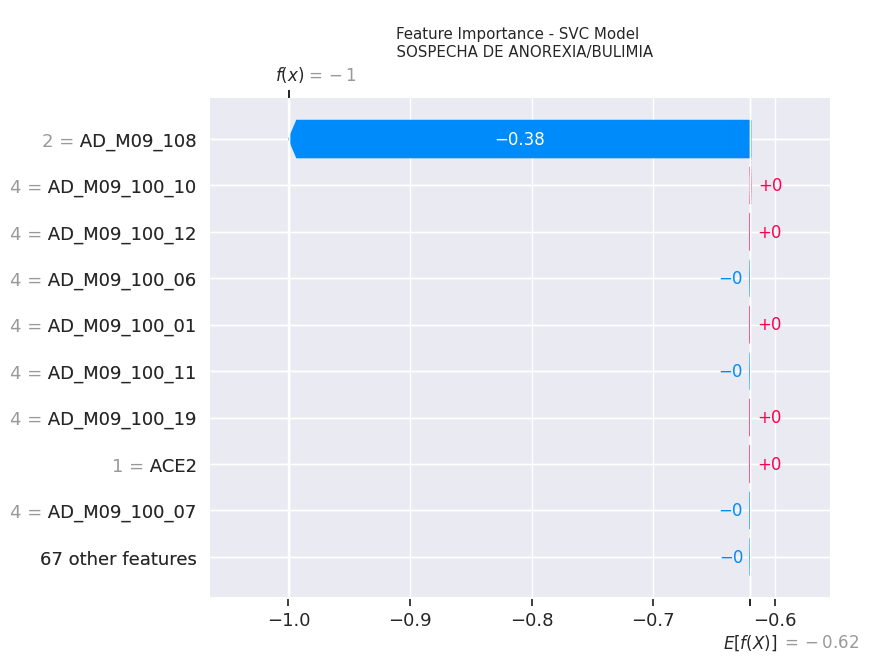

In [143]:
import shap
import matplotlib.pyplot as plt

final_pipe = update_model(svc_tuned)

model = final_pipe.named_steps['svc']

for i in range(len(y.columns)):
    fit_model = model.fit(X_train, y_train.iloc[:,i])

    explainer = shap.Explainer(fit_model, X_train, feature_names=X_train.columns)
    shap_values = explainer(X_test)

    plt.figure(figsize=(6, 4))  # Set the dimensions of the plot
    shap.plots.waterfall(shap_values[0], show=False)
    plt.title(f"\nFeature Importance - SVC Model \n  {y.columns[i]}")
    plt.show()
    #plot_feature_importances(feature_lst[i], feature_names, f"Importancia de Características - {y.columns[i]}")

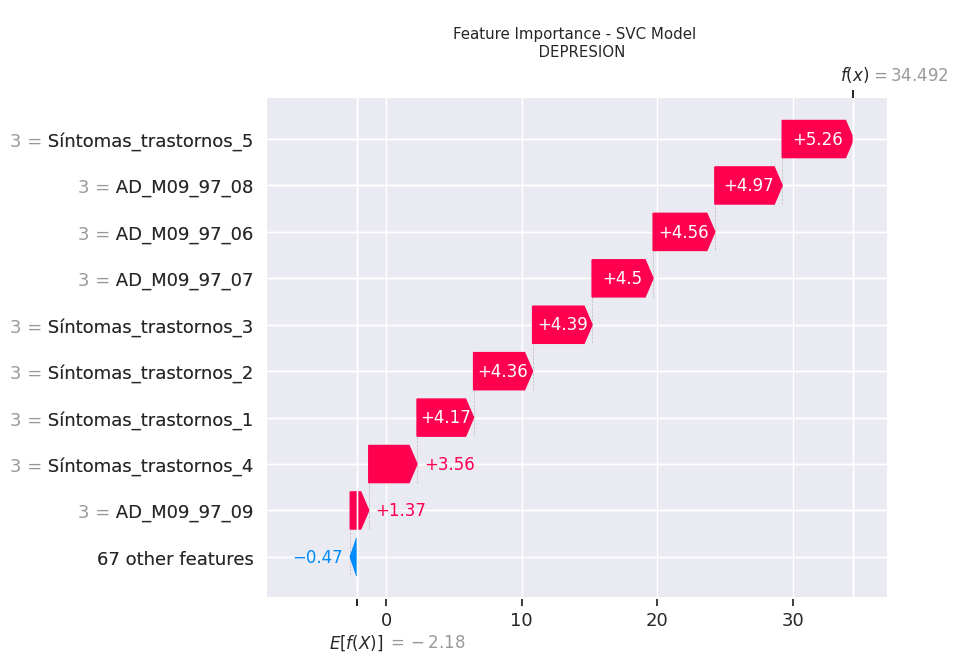

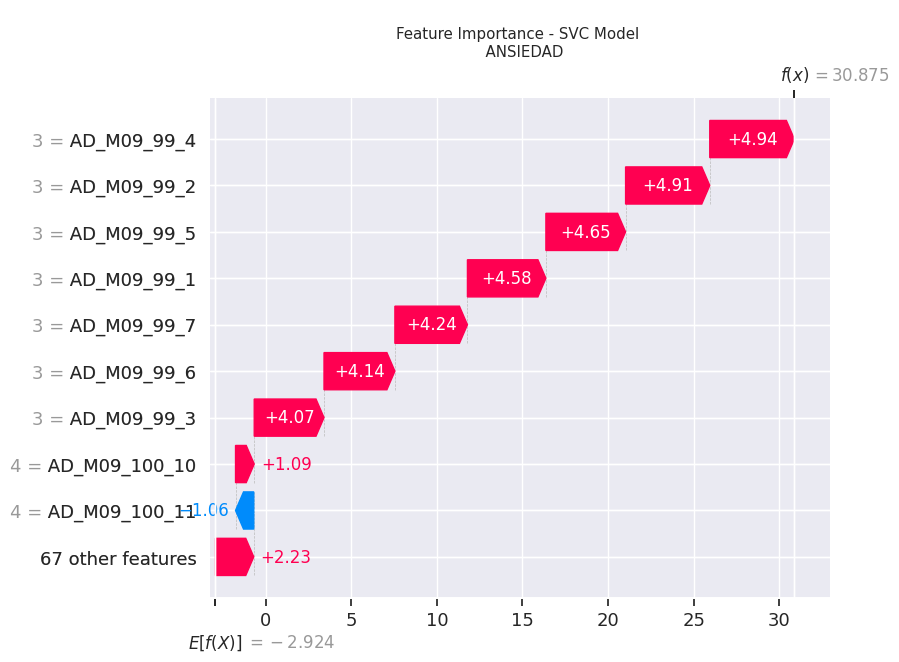

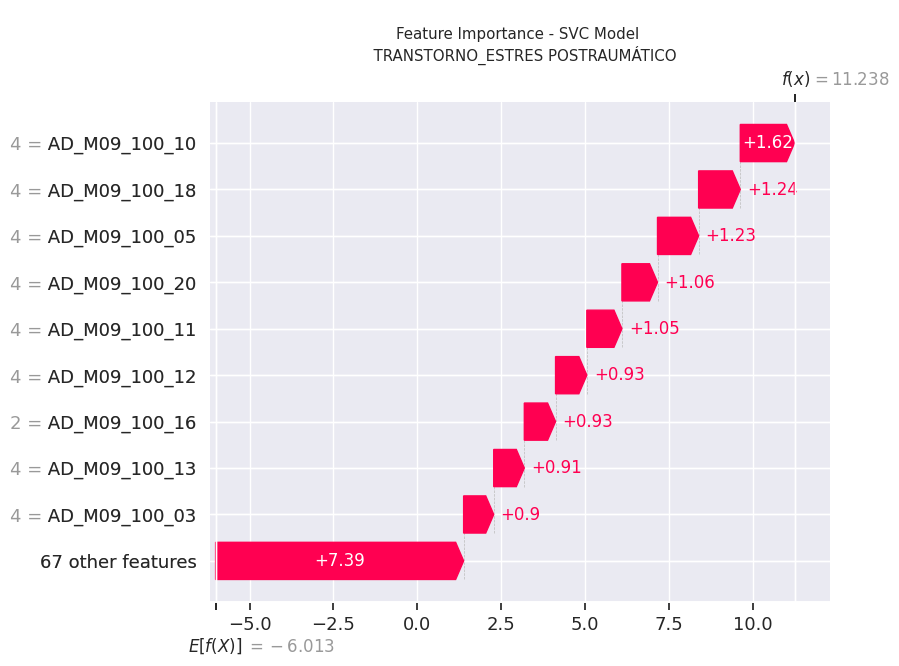

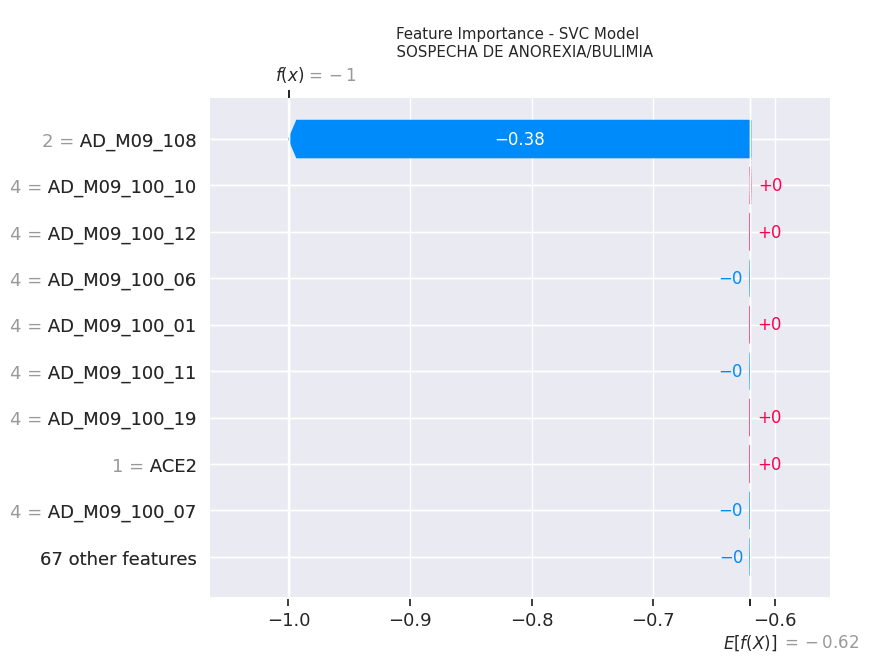

In [139]:
import shap
final_pipe = update_model(svc_tuned)

model = final_pipe.named_steps['svc']
model
# train an XGBoost model
#X, y = shap.datasets.california()
#model = xgboost.XGBRegressor().fit(X, y)
for i in range(len(y.columns)):
  fit_model = model.fit(X_train, y_train.iloc[:,i])
#fit_model = model.predict(X_test)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
  explainer = shap.Explainer(fit_model, X_train, feature_names=X_train.columns)#fit_model.get_feature_names_out())
  shap_values = explainer(X_test)

# visualize the first prediction's explanation
  shap.plots.waterfall(shap_values[0], show=False)
  plt.title(f"\nFeature Importance - SVC Model \n  {y.columns[i]}")
  plt.show()
  #plot_feature_importances(feature_lst[i], feature_names, f"Importancia de Características - {y.columns[i]}")


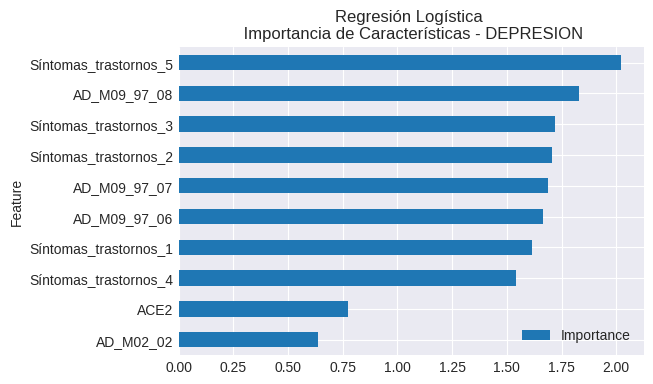

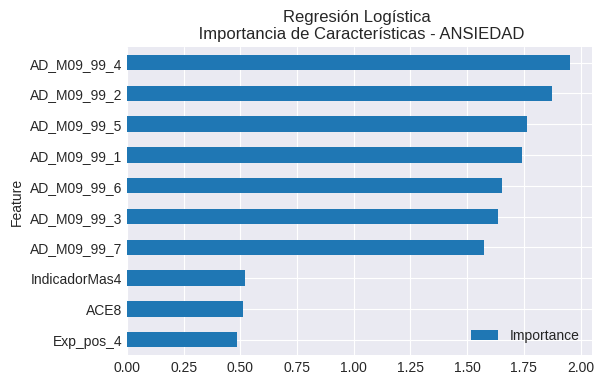

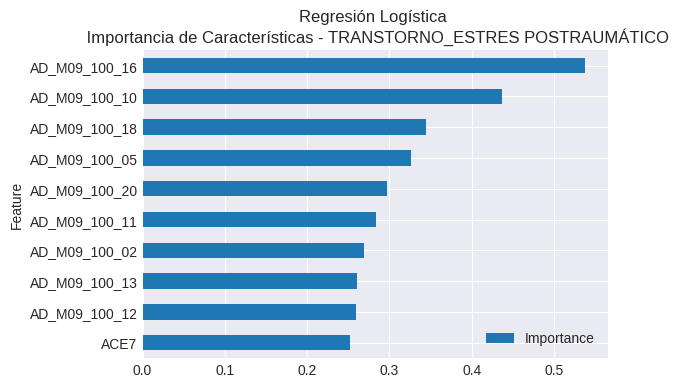

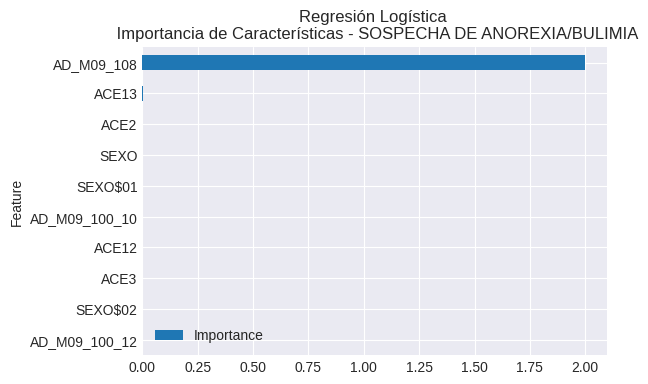

In [128]:
final_pipe = update_model(svc_tuned)

model = final_pipe.named_steps['svc']

for i in range(len(y.columns)):
  model.fit(X_train, y_train.iloc[:,i])
  coefficients = model.coef_[0]
  feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
  feature_importance = feature_importance.sort_values('Importance', ascending=True)[-10:]
  feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(6, 4),fontsize=10, title = f"Regresión Logística \n Importancia de Características - {y.columns[i]}")

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

final_pipe = update_model(svc_tuned)

svc_model = final_pipe.named_steps['svc']


plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

InvalidIndexError: (slice(None, None, None), 1)

<Figure size 1000x800 with 0 Axes>

In [130]:
# Determinamos una lista por target con vectores que representan las importancias
# de cada variable de entrada
final_pipe = update_model(svc_tuned)

model = final_pipe.named_steps['svc']

feature_lst = []

for i in range(len(y.columns)):
  model.fit(X_train, y_train.iloc[:,i])
  feature_importances = model.feature_importances_
  feature_lst.append(feature_importances)

AttributeError: 'SVC' object has no attribute 'feature_importances_'

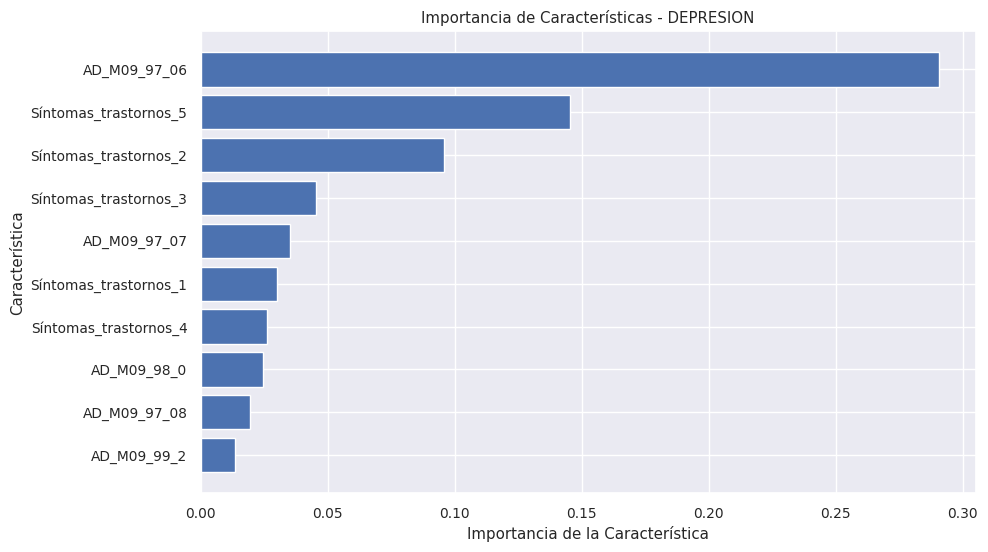

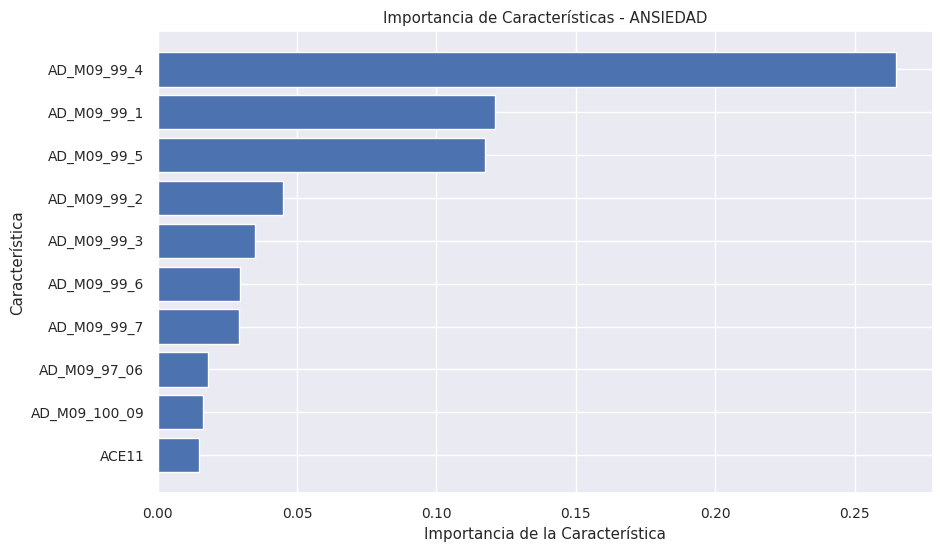

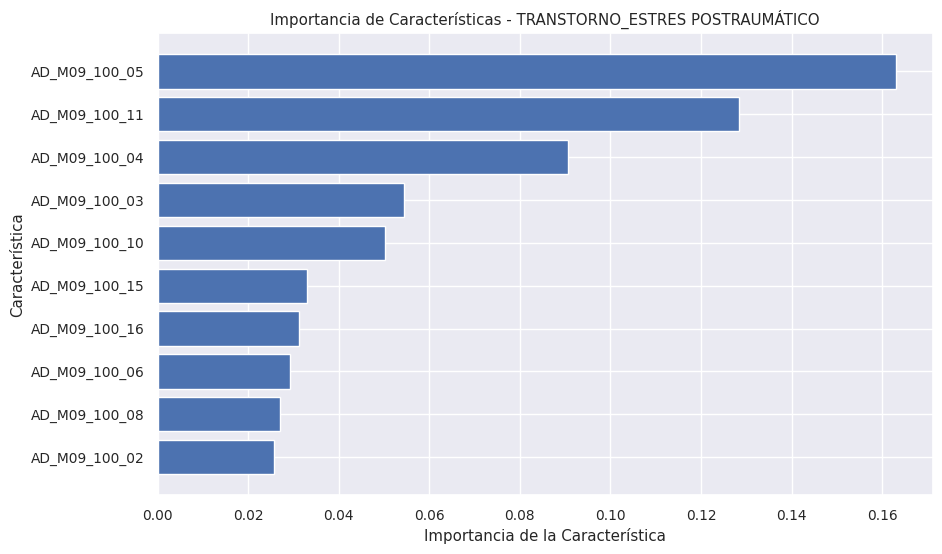

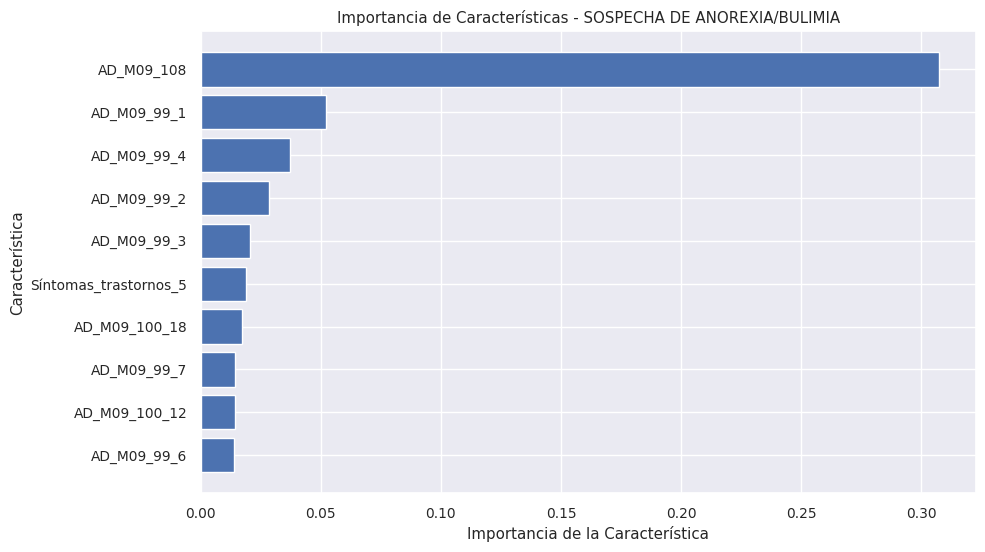

In [ ]:

# Nombres de las características después de la codificación One-Hot y otros preprocesamientos
feature_names = np.array(X_train.columns.tolist())

# Función para visualizar la importancia de las características
def plot_feature_importances(importances, feature_names, title):
    # Ordenar las importancias y sus índices
    indices = np.argsort(importances)[::-1]
    sorted_feature_names = feature_names[indices]

    # Seleccionar las 10 características más importantes
    #features[sorted_idx][-10:]
    top_indices = indices[:10]
    top_importances = importances[top_indices]
    top_feature_names = sorted_feature_names[:10]

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.barh(range(len(top_indices)), top_importances, align='center')
    plt.yticks(range(len(top_indices)), top_feature_names)
    plt.gca().invert_yaxis()  # Invertir el eje y para tener la característica más importante en la parte superior
    plt.xlabel('Importancia de la Característica')
    plt.ylabel('Característica')
    plt.show()

# Visualizar la importancia de las características para menores de 4 años

for i in range(len(y.columns)):
  plot_feature_importances(feature_lst[i], feature_names, f"Importancia de Características - {y.columns[i]}")

En el caso específico de ANOREXIA/BULIMIA, vemos que solamente las primeras tres preguntas tienen qué ver con la alimentación, lo cual nos hace pensar que la poca cantidad de este tipo de preguntas podría afectar el desempeño del modelo.

1. AD_M09_106 -  ¿ESTÁ PREOCUPADO/A PORQUE SIENTE QUE TIENE QUE CONTROLAR CUANTO COME?
2. AD_M09_105 ¿TIENE LA SENSACIÓN DE ESTAR ENFERMO/A PORQUE SIENTE EL ESTÓMAGO TAN LLENO QUE LE RESULTA INCÓMODO?
3. AD_M09_109 ¿DIRÍA QUE LA COMIDA DOMINA SU VIDA?

# Gráfico ROC - Modelo XGB ajustado

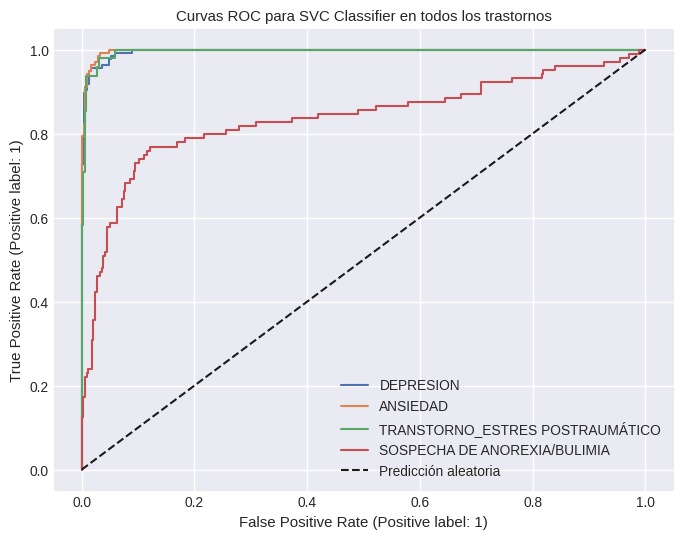

In [149]:
from sklearn.metrics import RocCurveDisplay

final_pipe = update_model(svc_tuned)

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(y.columns)):
    final_pipe.fit(X_train, y_train.iloc[:, i])
    roc_display = RocCurveDisplay.from_estimator(final_pipe, X_test, y_test.iloc[:, i], ax=ax)
    roc_display.line_.set_label(y.columns[i])

plt.plot([0, 1], [0, 1], 'k--', label='Predicción aleatoria')  # Plot the diagonal line
plt.legend()
plt.title('Curvas ROC para SVC Classifier en todos los trastornos')
plt.show()

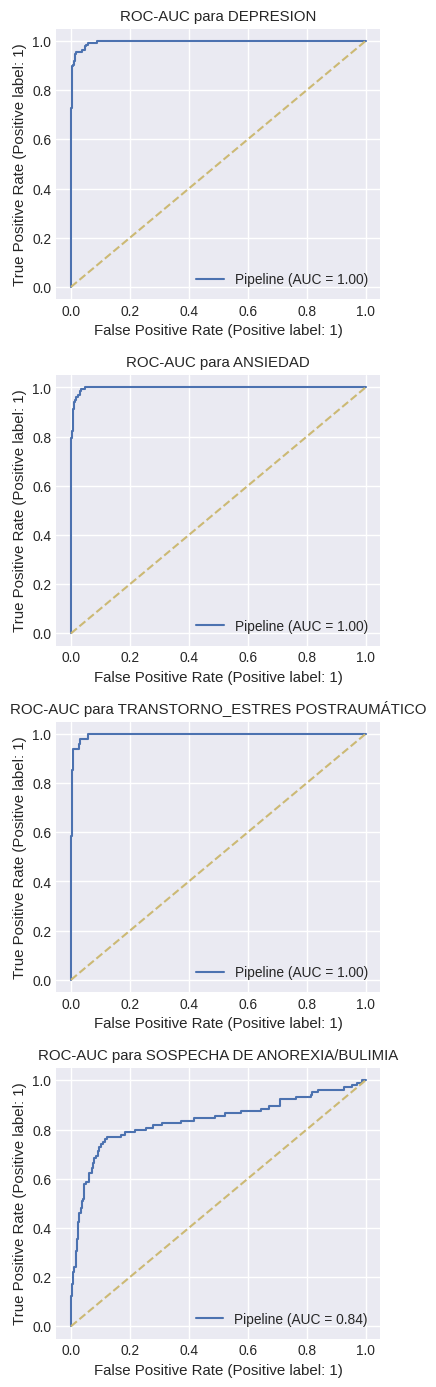

In [150]:
# Con pipeline integrado

final_pipe = update_model(svc_tuned)


# Hacemos la búsqueda de parámetros óptimos con el nuevo modelo base:
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(len(y.columns), 1, figsize=(4, 3.5 * len(y.columns)))

for i in range(len(y.columns)):
    final_pipe.fit(X_train, y_train.iloc[:, i])
    RocCurveDisplay.from_estimator(final_pipe, X_test, y_test.iloc[:, i], ax=axes[i])
    axes[i].set_title(f'ROC-AUC para {y.columns[i]}')
    axes[i].plot([0, 1], [0, 1], 'y--')  # Plot the diagonal line

plt.tight_layout()
plt.show()

# elapsed time = 27s

Estamos visualizando un gráfico ROC por tipo de variable de salida para el modelo final utilizando nuestra canalización centralizada.

De las gráficas de ROC podemos ver que aún cuando hay cierta oportunidad de mejora en ANSIEDAD y DEPRESIÓN, el desempeño es relativamente bueno para un modelo que se utiizaría para un diagnóstico rápido de las personas. para TRASTORNO DE ESTRÉS POST-TRAUMÁTICO, el desempeño fué el mejor de todos y el menos confiable sigue siendo SOSPECHA DE ANOREXIA/BULIMIA, que es donde el equipo de diseño de las encuestas estaría revisando cómo identificar preguntas, aunque redundantes pero que aporten una mayor cantidad de información.

#Matriz de Confusión - Modelo XGB ajustado

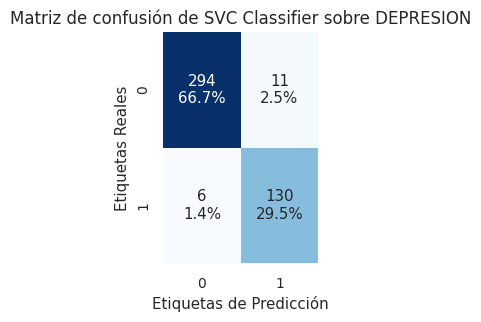

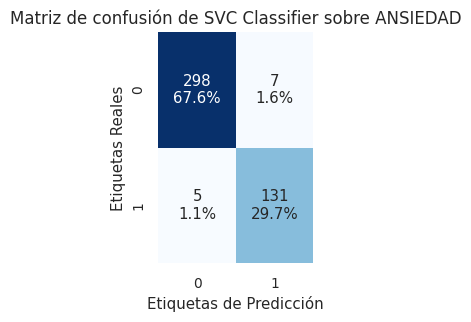

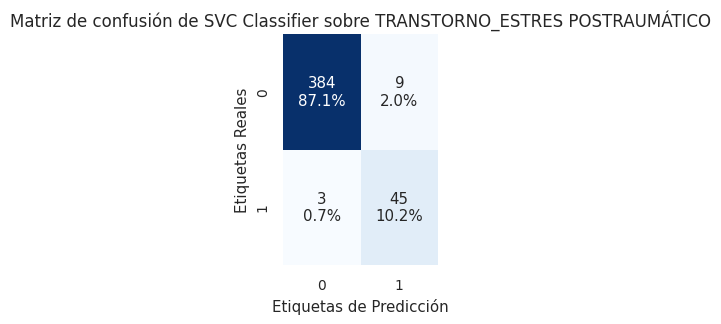

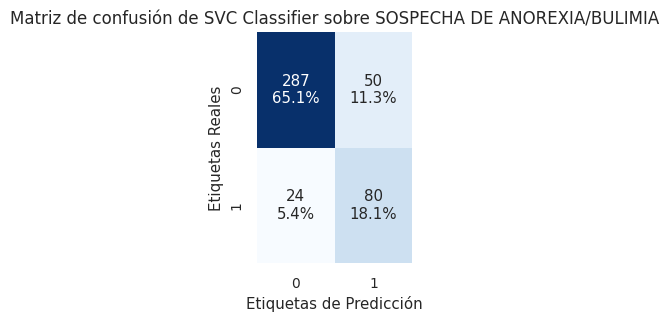

In [135]:
# Visualizamos las matrices de confusión para mayor detalle en el desempeño del
# modelo final sobre la clase minoritaria, que es donde hay presencia de algún trastorno.

updated_pipe = update_model(svc_tuned)

for i in range(len(y.columns)):
  updated_pipe.fit(X_train, y_train.iloc[:,i])

  y_hat=updated_pipe.predict(X_test)

  cm = confusion_matrix(y_test.iloc[:,i], y_hat)

  # Visualizamos los resultados del modelo en una matriz de confusión

  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}" for v1, v2 in zip(frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)
  sns.set(rc={'figure.figsize':(2,3)},font_scale=0.9)
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.title(f'Matriz de confusión de SVC Classifier sobre {y.columns[i]}',fontsize=12)
  plt.show()



De las matrices de confusión vemos en promedio un 4.9% de FN's, siendo ANOREXIA/BULIMIA el que mayor error de este tipo presenta con un 7.5% de FN's. La recomendación en caso de utiliar este modelo por el equipo de investigación será en adición a enriquecer la encuesta en preguntas relacionadas con este trastorno, realizar un muestreo de las personas que fueron diagnosticadas como sanas tomando 7 - 10 % de la población y verificar nuevamente el diagnóstico con un experto en el área.

# Curvas de aprendizaje - Modelo XGB ajustado

Evaluamos el efecto de agregar más muestras a los ciclos de entrenamiento de los modelos en cada época, así como su capacidad de generalizar en los subconjuntos de prueba para determinar si existe una condición de sub-ajuste o sobre-ajuste.

In [ ]:
# Creamos una función par automatizar la generación de las curvas de aprendizaje

def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, model_name, target):

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(4,3))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')

    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')

    plt.title(f'Curvas de Aprendizaje de {model_name} sobre {target} incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [ ]:
def mi_ModeloYCurvas(Xin, modelo, target, model_name):

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=7)

       updated_pipe = update_model(modelo)
       delta_train_sz = np.linspace(0.1,1,40)

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = updated_pipe,
                                                        X = Xin,
                                                        y = y[target],
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        random_state=11)

       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, model_name, target)


Curvas de aprendizaje del modelo lineal:


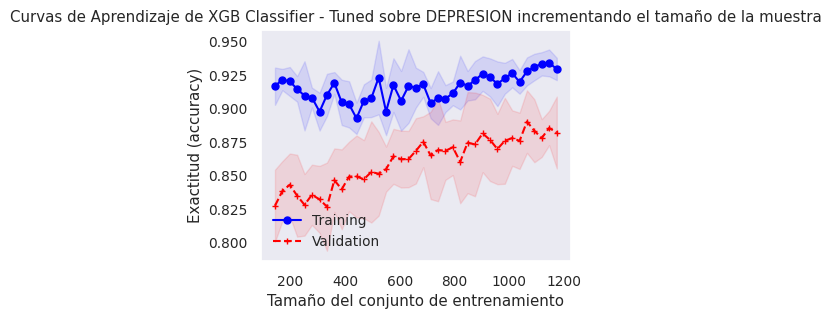

Curvas de aprendizaje del modelo lineal:


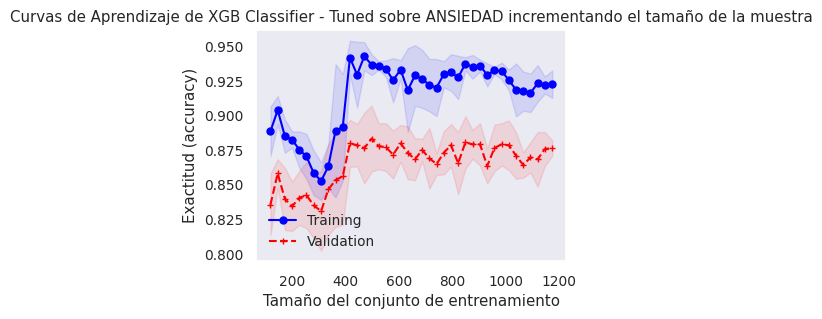

Curvas de aprendizaje del modelo lineal:


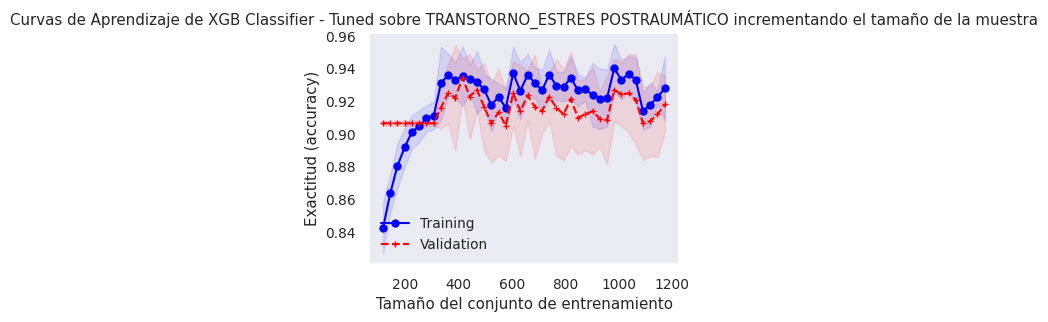

Curvas de aprendizaje del modelo lineal:


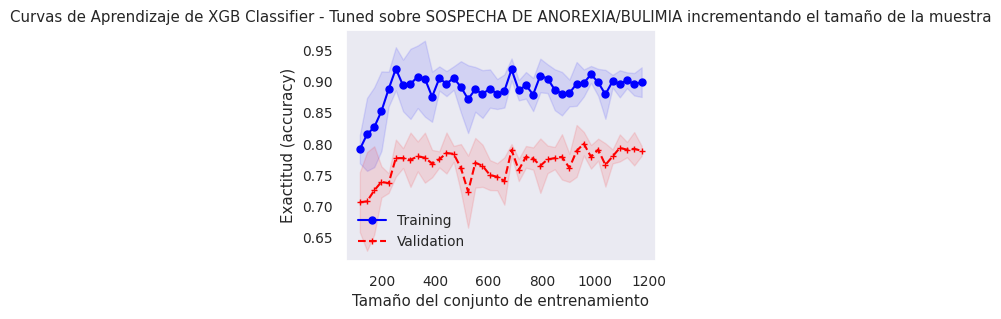

In [ ]:
# Verificamos las curvas de entrenamiento que se obtienen con 87 variables de entrada:

#for name,model in models.items():
for target in y.columns:
  print('Curvas de aprendizaje del modelo lineal:')
  mi_ModeloYCurvas(X, xgb_clf_tuned, target, 'XGB Classifier - Tuned')

**Sub-Ajuste Vs Sobre-Ajuste**

Se observa que el modelo no está ni sub ni sobre ajustado en ningún target, ya que la diferencia en el desempeño del conjunto de validación con el de entrenamiento es menor a 10%. Para el caso de SOSPECHA DE ANOREXIA/BULIMIA sí presenta cierto sobreentrenamiento, con una diferencia de Exactitud de alrededor de 12% entre el conjunto de entrenamiento y el de validación, aunque se observa que la curva de aprendizaje de validación va mejorando ligeramente al aumentar el tamaño de la muestra en el ciclo de entrenamiento.

En cuanto al tiempo requerido para ejecutar esta porción del código, se hizo una prueba con Random Forest Classifier, que requirió 1 hora 52 minutos, mientras que XGB Classifier lo hizo en alrededor de 14 minutos.

# Conclusión

Se utilizó la información proporcionada por el personal experto y se filtraron los datos generales y geográficos que impactaban negativamente a los modelos, ya que en este momento no nos interesa conocer alguna dependencia entre este tipo de factores con los padecimientos de interés, sino más bien modelar las experiencias tanto adversas como positivas que reportan las personas en su desarrollo como individuos y su interacción con otros en la familia y en la sociedad.

El modelo alineado final cumple con la necesidad del negocio de tener una herramienta de diagnóstico rápido para tomar acciones cuando las personas entrevistadas proporcionen información que, de acuerdo con la estructura de la encuesta, permite que el modelo pueda realizar una predicción confiable, sobre todo en la clase minoritaria, que es la de interés en cada uno de los trastornos, sin embargo existe una oportunidad de mejora significativa para ANOREXIA/BULIMIA como se hizo evidente en los diferentes gráficos de desempeño mostrados.

**Referencias:**

Galli, S. (2022, October). *Python Feature Engineering Cookbook - Second Edition*. Packt Publishing.

Géron, A. (2022). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition*. O'Reilly Media, Inc.

Nallaperumal (2020). *ML Pipeline*. Analytics Vidhya. https://medium.com/analytics-vidhya/ml-pipeline-59f0252ff85